<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd

In [2]:
!pip install pandas

Liste des librairies utilisés :

 pandas (2.2.2)<br>
 numpy (1.26.4)<br>
 python-dateutil (2.8.2)<br>
 pytz (2023.3.post1)<br>
 tzdata (2023.3)<br>
 six (1.16.0)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [3]:
#Importation du fichier web.xlsx
chemin_fichier_web = '/Users/adrianaguilera/Desktop/P6/inputs/web.xlsx'
web = pd.read_excel(chemin_fichier_web)
#Importation du fichier erp.xlsx
chemin_fichier_erp = '/Users/adrianaguilera/Desktop/P6/inputs/erp.xlsx'
erp = pd.read_excel(chemin_fichier_erp)
#importation du fichier liaison.xlsx
chemin_fichier_liaison = '/Users/adrianaguilera/Desktop/P6/inputs/liaison.xlsx'
liaison = pd.read_excel(chemin_fichier_liaison)

/opt/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/opt/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/opt/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [4]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [5]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(erp.shape[1]))

#La nature des données dans chacune des colonnes
erp_nature_donnees = erp.dtypes
print("Voici la nature de données de chacune des colonnes :", erp_nature_donnees)

#Le nombre de valeurs présentes dans chacune des colonnes
erp_nbre_valeurs_colonnes = erp.count()
print("Voici le nombre de valeurs présentes dans chacune des colonnes :", erp_nbre_valeurs_colonnes)

Le tableau comporte 6 colonne(s)
Voici la nature de données de chacune des colonnes : product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
purchase_price    float64
dtype: object
Voici le nombre de valeurs présentes dans chacune des colonnes : product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
purchase_price    825
dtype: int64


In [6]:
#Afficher les 5 premières lignes de la table
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [7]:
#Afficher un aperçu rapide des données
erp.describe()

,product_id,onsale_web,price,stock_quantity,purchase_price
count,825.000000,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.867879,32.187697,21.589091,16.940582
std,902.644635,0.338828,26.712077,21.933807,14.561840
min,3847.000000,0.000000,-20.000000,-10.000000,2.740000
25%,4348.000000,1.000000,14.500000,7.000000,7.590000
50%,4907.000000,1.000000,24.300000,18.000000,12.710000
75%,5805.000000,1.000000,42.000000,30.000000,22.020000
max,7338.000000,1.000000,225.000000,145.000000,137.810000


In [8]:
#Vérifier s'il y a les lignes en doublons dans la colonne product_id
erp_product_id_doublons = erp['product_id'].duplicated().sum()
if erp_product_id_doublons > 0:
    print("Il y a {erp_product_id_doublons} doublons dans la colonne 'product_id'")
else:
    print("Il n'y a pas de doublon dans la colonne 'product_id'")

Il n'y a pas de doublon dans la colonne 'product_id'


In [9]:
#Afficher les valeurs distinctes de la colonne stock_status
erp_stock_status_valeurs = erp['stock_status'].unique()
print("Valeurs distinctes dans la colonne 'stock_status' :", erp_stock_status_valeurs)

#À quelle(s) autre(s) colonne(s) sont-elles liées ?
print("Cette colonne est directement liée à la colonne 'stock_quantity'")

Valeurs distinctes dans la colonne 'stock_status' : ['instock' 'outofstock']
Cette colonne est directement liée à la colonne 'stock_quantity'


In [10]:
#Création d'une colonne "stock_status_2"
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#Si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
erp['stock_status_2'] = erp['stock_quantity'].apply(lambda x: 'outofstock' if pd.isnull(x) or x == 0 else 'instock')
print(erp)

     product_id  onsale_web  price  stock_quantity stock_status  \
0          3847           1   24.2              16      instock   
1          3849           1   34.3              10      instock   
2          3850           1   20.8               0   outofstock   
3          4032           1   14.1              26      instock   
4          4039           1   46.0               3   outofstock   
..          ...         ...    ...             ...          ...   
820        7203           0   45.0              30      instock   
821        7204           0   45.0               9      instock   
822        7247           1   54.8               6      instock   
823        7329           0   26.5              14      instock   
824        7338           1   16.3              40      instock   

     purchase_price stock_status_2  
0             12.88        instock  
1             17.54        instock  
2             10.64     outofstock  
3              6.92        instock  
4         

In [11]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
erp_stocks_comparaison = erp["stock_status"] == erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter
print(erp_stocks_comparaison)

0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool


In [12]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne :
#True vaut 1 et False 0
erp_somme_valeurs_identiques = erp_stocks_comparaison.sum()
print("Nombre de lignes identiques :", erp_somme_valeurs_identiques)

Nombre de lignes identiques : 821


In [13]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
erp_stocks_ecart_lignes = erp[~erp_stocks_comparaison]
erp_stocks_ecart_lignes

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
4,4039,1,46.0,3,outofstock,23.77,instock
398,4885,1,18.7,0,instock,9.66,outofstock
449,4973,0,10.0,-10,outofstock,4.96,instock
573,5700,1,44.5,-1,outofstock,22.30,instock


In [14]:
#Corriger la ou les données incohérentes (outofstock si stock_quantity est négatif)
erp.loc[erp['stock_quantity'] < 0, 'stock_status_2'] = 'outofstock'

#Verification en utilisant le même code que plus haut pour afficher les problemes
print(erp.loc[erp.index.isin([573, 449])])

#Afficher le nombre de lignes identiques
erp_stocks_comparaison2 = erp["stock_status"] == erp["stock_status_2"]
erp_somme_valeurs_identiques2 = erp_stocks_comparaison2.sum()
print("Nombre de lignes identiques :", erp_somme_valeurs_identiques2)

     product_id  onsale_web  price  stock_quantity stock_status  \
449        4973           0   10.0             -10   outofstock   
573        5700           1   44.5              -1   outofstock   

     purchase_price stock_status_2  
449            4.96     outofstock  
573           22.30     outofstock  
Nombre de lignes identiques : 823


In [15]:
#Supprimer la colonne 'stock_status'
erp.drop(columns=['stock_status'], inplace=True)

In [16]:
#Renommer la colonne 'stock_status_2' en 'stock_status'
erp.rename(columns={'stock_status_2': 'stock_status'}, inplace=True)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.0 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse de la variable PRIX</h3>
</div>

In [17]:
#######################
#####    price    #####
#######################

In [18]:
#Afficher le ou les prix non renseigné(s) dans la colonne "price"
erp_price_nonrenseigne = erp["price"].isnull().sum()
print("Nombre d'articles avec un prix non renseigné : {}".format(erp_price_nonrenseigne))

Nombre d'articles avec un prix non renseigné : 0


In [19]:
#Afficher le ou les prix nul(s) dans la colonne "price"
erp_price_null = erp[erp["price"] == 0]
somme_erp_price_null = erp_price_null['price'].sum()
print("Nombre d'articles avec un prix nul : {}".format(somme_erp_price_null))

Nombre d'articles avec un prix nul : 0.0


In [20]:
#Afficher le prix maximum de la colonne "price"
erp_price_max = erp['price'].max()
print("Prix maximum dans la colonne 'price' : {}".format(erp_price_max))

Prix maximum dans la colonne 'price' : 225.0


In [21]:
#Afficher le prix minimum de la colonne "price"
erp_price_min = erp['price'].min()
print("Prix minimum dans la colonne 'price' : {}".format(erp_price_min))

Prix minimum dans la colonne 'price' : -20.0


In [22]:
#Afficher le ou les prix négatif(s) dans la colonne "price"
erp_price_negatif = erp[erp["price"] < 0]
print("Affichage des articles avec un prix negatif :")
erp_price_negatif

Affichage des articles avec un prix negatif :


,product_id,onsale_web,price,stock_quantity,purchase_price,stock_status
151,4233,0,-20.0,0,10.33,outofstock
469,5017,0,-8.0,0,4.34,outofstock
739,6594,0,-9.1,19,4.61,instock


In [23]:
#Remplacer les valeurs négatives par des NaN
erp.loc[erp['price'] < 0, 'price'] = None

In [24]:
#Vérification du résultat
erp_price_min_verif = erp['price'].min()
print("Prix minimum dans la colonne 'price' : {}".format(erp_price_min_verif))

Prix minimum dans la colonne 'price' : 5.2


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.2 - Analyse de la variable STOCK</h3>
</div>

In [25]:
#######################
### stock_quantity  ###
#######################

In [26]:
#Afficher la quantité de stock non renseignée dans la colonne "stock_quantity"
erp_stock_quantity_nonrenseigne = erp["stock_quantity"].isnull().sum()
print("Quantité de stock non renseignée : {}".format(erp_stock_quantity_nonrenseigne))

Quantité de stock non renseignée : 0


In [27]:
#Afficher la quantité de stock nul dans la colonne "stock_quantity"
erp_stock_quantity_null = (erp["stock_quantity"] == 0).sum()
print("Quantité de stock nul : {}".format(erp_stock_quantity_null))

Quantité de stock nul : 90


In [28]:
#Afficher le pourcentage de quantité de stock nul dans la colonne "stock_quantity"
erp_stock_quantity_null_pourcentage = (erp_stock_quantity_null / len(erp)) * 100
erp_stock_quantity_null_pourcentage = round(erp_stock_quantity_null_pourcentage, 2)
print("Pourcentage de stock nul : {}".format(erp_stock_quantity_null_pourcentage))

Pourcentage de stock nul : 10.91


In [29]:
#Afficher la quantité maximum de la colonne "stock_quantity"
erp_stock_quantity_max = erp['stock_quantity'].max()
print("Quantité maximum dans la colonne 'stock_quantity' : {}".format(erp_stock_quantity_max))

Quantité maximum dans la colonne 'stock_quantity' : 145


In [30]:
#Afficher la quantité minimum de la colonne "stock_quantity"
erp_stock_quantity_min = erp['stock_quantity'].min()
print("Quantité minimum dans la colonne 'stock_quantity' : {}".format(erp_stock_quantity_min))

Quantité minimum dans la colonne 'stock_quantity' : -10


In [31]:
#Afficher le stock négatif dans la colonne "stock_quantity"
erp_stock_quantity_negatif = erp[erp["stock_quantity"] < 0]
print("Affichage du stock negatif :")
erp_stock_quantity_negatif

Affichage du stock negatif :


,product_id,onsale_web,price,stock_quantity,purchase_price,stock_status
449,4973,0,10.0,-10,4.96,outofstock
573,5700,1,44.5,-1,22.30,outofstock


In [32]:
#Remplacer les valeurs négatives par 0
erp.loc[erp['stock_quantity'] < 0, 'stock_quantity'] = 0

In [33]:
#Vérification du résultat
erp_stock_quantity_negatif_verif = erp['stock_quantity'].min()
print("Nombre de stock négatif dans la colonne 'stock_quantity' : {}".format(erp_stock_quantity_negatif_verif))

Nombre de stock négatif dans la colonne 'stock_quantity' : 0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [34]:
######################
###   onsale_web   ###
######################

In [35]:
#Vérifier les valeurs uniques dans la colonne 'onsale_web'
erp_onsale_web_valeurs_uniques = erp['onsale_web'].unique()
print("Valeurs uniques dans 'onsale_web' : {}".format(erp_onsale_web_valeurs_uniques))

Valeurs uniques dans 'onsale_web' : [1 0]


In [36]:
#Cette colonne nous dit si le produit est vendu sur le web ou non

In [37]:
#Afficher la quantité de valeurs non renseignées dans la colonne "onsale_web"
erp_onsale_web_nonrenseigne = erp["onsale_web"].isnull().sum()
print("Quantité de valeurs non renseignées : {}".format(erp_onsale_web_nonrenseigne))

Quantité de valeurs non renseignées : 0


In [38]:
#Afficher le nombre de produits vendus sur le web
erp_onsale_web_produits = (erp["onsale_web"] == 1).sum()
print("Nombre de produits vendus sur le web : {}".format(erp_onsale_web_produits))

#Afficher le pourcentage du nombre de produits vendus sur le web
erp_onsale_web_produits_pourcentage = (erp_onsale_web_produits / len(erp)) * 100
erp_onsale_web_produits_pourcentage = round(erp_onsale_web_produits_pourcentage,2)
print("Pourcentage du nombre de produits vendus sur le web : {}".format(erp_onsale_web_produits_pourcentage))

Nombre de produits vendus sur le web : 716
Pourcentage du nombre de produits vendus sur le web : 86.79


In [39]:
#Intervertir les colonnes 'stock_quantity' et 'purchase_price' pour plus de lisibilité
colonnes = ['product_id', 'price', 'purchase_price', 'onsale_web', 'stock_quantity', 'stock_status']
erp = erp[colonnes]

In [40]:
#Affichage du dataset
erp.head()

,product_id,price,purchase_price,onsale_web,stock_quantity,stock_status
0,3847,24.2,12.88,1,16,instock
1,3849,34.3,17.54,1,10,instock
2,3850,20.8,10.64,1,0,outofstock
3,4032,14.1,6.92,1,26,instock
4,4039,46.0,23.77,1,3,instock


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.4 - Analyse de la variable PRIX D'ACHAT</h3>
</div>

In [41]:
######################
##  purchase_price  ##
######################

In [42]:
#Afficher la quantité de stock non renseignée dans la colonne "purchase_price"
erp_purchase_price_nonrenseigne = erp["purchase_price"].isnull().sum()
print("Quantité de stock non renseignée : {}".format(erp_purchase_price_nonrenseigne))

Quantité de stock non renseignée : 0


In [43]:
#Afficher la quantité de stock nul dans la colonne "purchase_price"
erp_purchase_price_null = (erp["purchase_price"] == 0).sum()
print("Quantité de stock nul : {}".format(erp_purchase_price_null))

Quantité de stock nul : 0


In [44]:
#Afficher la quantité maximum de la colonne "purchase_price"
erp_purchase_price_max = erp['purchase_price'].max()
print("Quantité maximum dans la colonne 'purchase_price' : {}".format(erp_purchase_price_max))

Quantité maximum dans la colonne 'purchase_price' : 137.81


In [45]:
#Afficher la quantité minimum de la colonne "purchase_price"
erp_purchase_price_min = erp['purchase_price'].min()
print("Quantité minimum dans la colonne 'stock_quantity' : {}".format(erp_purchase_price_min))

Quantité minimum dans la colonne 'stock_quantity' : 2.74


<div style="font-size: 18px;">Pour le fichier erp, nous avons <strong>825 lignes de produits</strong>. <br>
Nous avons corrigé :<br>
- 2 erreurs de <strong>stock_status</strong> qui ne correpondaient pas au <strong>stock_quantity</strong><br>
- 2 erreurs de <strong>stock_quantity</strong> négatifs, remplacés par des stock à 0<br>
- 3 erreurs <strong>price</strong> négatifs, remplacés par des NaN<br>
716 produits sont vendus sur le web.
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [46]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(web.shape[0]))
print("Le tableau comporte {} colonne(s)".format(web.shape[1]))

Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 29 colonne(s)


In [47]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(web.shape[1]))

#La nature des données dans chacune des colonnes
web_nature_donnees = web.dtypes
print("Voici la nature de données de chacune des colonnes :", web_nature_donnees)

#Le nombre de valeurs présentes dans chacune des colonnes
web_nbre_valeurs_colonnes = web.count()
print("Voici le nombre de valeurs présentes dans chacune des colonnes :", web_nbre_valeurs_colonnes)

Le tableau comporte 29 colonne(s)
Voici la nature de données de chacune des colonnes : sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
product_type                     object
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           f

In [48]:
#Afficher le nombre de valeurs uniques pour chaque colonne
web_valeurs_uniques = web.nunique()
print("Nombre de valeurs uniques pour chaque colonne : {}", web_valeurs_uniques)

Nombre de valeurs uniques pour chaque colonne : {} sku                       714
virtual                     1
downloadable                1
rating_count                1
average_rating              1
total_sales                29
tax_status                  1
tax_class                   0
post_author                 2
post_date                 716
post_date_gmt             716
post_content                0
product_type                7
post_title                713
post_excerpt              679
post_status                 1
comment_status              1
ping_status                 1
post_password               0
post_name                 716
post_modified             589
post_modified_gmt         589
post_content_filtered       0
post_parent                 1
guid                     1430
menu_order                  1
post_type                   2
post_mime_type              1
comment_count               1
dtype: int64


In [49]:
#Selon vous, quelles sont les colonnes à conserver ?
##Les colonnes vides ou avec une seule valeur unique sont inutiles.

web_colonnes_vides = web.columns[web.isna().all()].tolist()

web_colonnes_valeur_unique = web.columns[web.nunique() == 1].tolist()

web_colonnes_inutiles = web_colonnes_vides + web_colonnes_valeur_unique

print("Liste des colonnes inutiles : ", web_colonnes_inutiles)

Liste des colonnes inutiles :  ['tax_class', 'post_content', 'post_password', 'post_content_filtered', 'virtual', 'downloadable', 'rating_count', 'average_rating', 'tax_status', 'post_status', 'comment_status', 'ping_status', 'post_parent', 'menu_order', 'post_mime_type', 'comment_count']


In [50]:
#Supprimer ces colonnes
web.drop(columns=web_colonnes_inutiles, inplace=True)

In [51]:
#Supprimer les colonnes 'post_modified' et 'post_date' pour ne garder que 'post_modified_gmt' et 'post_date_gmt', plus simples et logiques
web.drop(columns=['post_modified','post_date'], inplace=True)

In [52]:
#Intervertir les colonnes pour plus de lisibilité
colonnes = ['sku', 'total_sales', 'product_type', 'post_title', 'post_name', 'post_date_gmt', 'post_modified_gmt', 'post_author', 'post_type', 'post_excerpt', 'guid']
web = web[colonnes]

In [53]:
#Afficher le dataset
web.head()

,sku,total_sales,product_type,post_title,post_name,post_date_gmt,post_modified_gmt,post_author,post_type,post_excerpt,guid
0,11862,3.0,Vin,Gilles Robin Hermitage Rouge 2012,gilles-robin-hermitage-2012,2018-02-12 12:46:23,2019-01-31 11:12:56,2.0,attachment,NaN,https://www.bottle-neck.fr/wp-content/uploads/...
1,16057,5.0,Vin,Domaine Pellé Sancerre Rouge La Croix Au Garde...,pelle-sancerre-rouge-la-croix-au-garde-2017,2018-04-17 13:29:17,2020-07-07 08:05:02,2.0,attachment,NaN,https://www.bottle-neck.fr/wp-content/uploads/...
2,14692,5.0,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,fonreaud-bordeaux-blanc-le-cygne-2016,2019-03-19 09:06:47,2020-04-25 19:40:31,2.0,product,<div>Grâce à la complémentarité des 3 cépages ...,https://www.bottle-neck.fr/?post_type=product&...
3,16295,14.0,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,2018-02-15 13:05:06,2020-08-27 16:55:03,2.0,attachment,NaN,https://www.bottle-neck.fr/wp-content/uploads/...
4,15328,2.0,Vin,Agnès Levet Côte Rôtie Maestria 2017,agnes-levet-cote-rotie-maestria-2017,2019-03-27 17:05:09,2020-07-25 13:45:02,2.0,product,"<span style=""float: none; background-color: tr...",https://www.bottle-neck.fr/?post_type=product&...


In [54]:
#Afficher un aperçu rapide des données
web.describe()

,total_sales,post_date_gmt,post_modified_gmt,post_author
count,1430.000000,1430,1430,1430.000000
mean,8.223077,2018-08-22 01:53:30.097902080,2020-06-20 12:06:02.509090816,1.998601
min,-56.000000,2018-02-08 11:58:52,2018-02-20 14:19:23,1.000000
25%,5.000000,2018-02-27 19:01:12.500000,2020-06-18 08:45:05.249999872,2.000000
50%,8.000000,2018-04-19 12:56:05,2020-08-04 07:30:06,2.000000
75%,11.000000,2019-01-31 13:35:47,2020-08-25 08:32:32,2.000000
max,122.000000,2020-07-20 09:00:00,2020-08-27 16:55:03,2.000000
std,6.721899,NaN,NaN,0.037385


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2.0 - Analyse exploratoire de chaque variable du fichier web.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2.1 - Analyse de la variable SKU</h3>
</div>

In [55]:
######################
######    sku   ######
######################

In [56]:
#Identifier et afficher les lignes sans code article dans la colonne 'sku'
web_sku_sanscode = web[web['sku'].isnull() | (web['sku'] == '')]

print("Lignes sans code article dans la colonne 'sku' :")
web_sku_sanscode

Lignes sans code article dans la colonne 'sku' :


,sku,total_sales,product_type,post_title,post_name,post_date_gmt,post_modified_gmt,post_author,post_type,post_excerpt,guid
8,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1384,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1429,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1445,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN


In [57]:
#Afficher plus de détails sur ces lignes
print("Informations détaillées des lignes sans code article :")
web_sku_sanscode.info()

Informations détaillées des lignes sans code article :
<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 8 to 1457
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                0 non-null      object        
 1   total_sales        2 non-null      float64       
 2   product_type       2 non-null      object        
 3   post_title         2 non-null      object        
 4   post_name          2 non-null      object        
 5   post_date_gmt      2 non-null      datetime64[ns]
 6   post_modified_gmt  2 non-null      datetime64[ns]
 7   post_author        2 non-null      float64       
 8   post_type          2 non-null      object        
 9   post_excerpt       2 non-null      object        
 10  guid               2 non-null      object        
dtypes: datetime64[ns](2), float64(2), object(7)
memory usage: 8.0+ KB


In [58]:
#2 articles n'ont pas d'id mais les autres colonnes sont renseignées
#Afficher uniquement les lignes où toutes les colonnes sauf 'sku' sont non nulles
web_sku_sanscode_non_nulles = web_sku_sanscode.dropna(subset=web_sku_sanscode.columns[1:])

print("Lignes pour lesquelles toutes les colonnes (sauf 'sku') sont renseignées :")
web_sku_sanscode_non_nulles

Lignes pour lesquelles toutes les colonnes (sauf 'sku') sont renseignées :


,sku,total_sales,product_type,post_title,post_name,post_date_gmt,post_modified_gmt,post_author,post_type,post_excerpt,guid
1084,NaN,-56.0,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,pierre-jean-villa-condrieu-suspendu-2018,2018-08-08 09:23:43,2019-11-02 12:24:01,2.0,product,"<span id=""u1194-83"">Le nez séduit par ses parf...",https://www.bottle-neck.fr/?post_type=product&...
1087,NaN,-17.0,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,pierre-jean-villa-cote-rotie-fongeant-2017,2018-07-31 10:07:23,2019-11-02 12:24:15,2.0,product,"Fongeant 2017 explose sur un fruit brillant, p...",https://www.bottle-neck.fr/?post_type=product&...


In [59]:
web.describe()

,total_sales,post_date_gmt,post_modified_gmt,post_author
count,1430.000000,1430,1430,1430.000000
mean,8.223077,2018-08-22 01:53:30.097902080,2020-06-20 12:06:02.509090816,1.998601
min,-56.000000,2018-02-08 11:58:52,2018-02-20 14:19:23,1.000000
25%,5.000000,2018-02-27 19:01:12.500000,2020-06-18 08:45:05.249999872,2.000000
50%,8.000000,2018-04-19 12:56:05,2020-08-04 07:30:06,2.000000
75%,11.000000,2019-01-31 13:35:47,2020-08-25 08:32:32,2.000000
max,122.000000,2020-07-20 09:00:00,2020-08-27 16:55:03,2.000000
std,6.721899,NaN,NaN,0.037385


In [60]:
#Assigner des 'sku' fictifs à ces deux lignes
web.loc[1084, 'sku'] = 'SKU_null1'
web.loc[1087, 'sku'] = 'SKU_null2'

#Remplacer leurs valeurs négatives dans 'total_sales' par NaN
web.loc[[1084, 1087], 'total_sales'] = None

#Vérifier le résultat 
print(web.loc[[1084, 1087]])

            sku  total_sales product_type  \
1084  SKU_null1          NaN          Vin   
1087  SKU_null2          NaN          Vin   

                                           post_title  \
1084  Pierre Jean Villa Condrieu Jardin Suspendu 2018   
1087       Pierre Jean Villa Côte Rôtie Fongeant 2017   

                                       post_name       post_date_gmt  \
1084    pierre-jean-villa-condrieu-suspendu-2018 2018-08-08 09:23:43   
1087  pierre-jean-villa-cote-rotie-fongeant-2017 2018-07-31 10:07:23   

       post_modified_gmt  post_author post_type  \
1084 2019-11-02 12:24:01          2.0   product   
1087 2019-11-02 12:24:15          2.0   product   

                                           post_excerpt  \
1084  <span id="u1194-83">Le nez séduit par ses parf...   
1087  Fongeant 2017 explose sur un fruit brillant, p...   

                                                   guid  
1084  https://www.bottle-neck.fr/?post_type=product&...  
1087  https://www.bottle-ne

In [61]:
#Maintenant, quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
web_sku_valeurs_nonconformes = web[web['sku'].str.len() > 5]

#Afficher les valeurs non conformes
print("Valeurs sku non conformes à la longueur de 6 caractères :")
print(web_sku_valeurs_nonconformes['sku'])

Valeurs sku non conformes à la longueur de 6 caractères :
272                 13127-1
842     bon-cadeau-25-euros
1084              SKU_null1
1087              SKU_null2
1117                13127-1
1387    bon-cadeau-25-euros
Name: sku, dtype: object


In [62]:
#Supprimer les lignes où toutes les colonnes sont nulles
web = web.dropna(how='all')

In [63]:
#Visualisation des valeurs de la colonne sku
print(web['sku'].describe())

count      1430
unique      716
top       11862
freq          2
Name: sku, dtype: int64


In [64]:
#Vérifier s'il y a les lignes en doublons dans la colonne sku
web_sku_doublons = web["sku"].duplicated().sum()
if web_sku_doublons > 0:
    print(f"Il y a {web_sku_doublons} doublons dans la colonne 'sku'")
else:
    print("Il n'y a pas de doublon dans la colonne 'sku'")

Il y a 714 doublons dans la colonne 'sku'


In [65]:
#Il y a 714 doublons dans la colonne sku
#Nous avons vu qu'il en est de même dans beaucoup d'autres colonnes 

In [66]:
#Mise en place d'une fonction pour analyser rapidement chaque variable pour des données numériques

def description_colonne(colonne_test) :
    #Afficher le type de donnée de la colonne
    web_colonne_type = web[colonne_test].dtype
    print("Type de donnée de la colonne : {}".format(web_colonne_type))

    #Nombre de lignes
    web_colonne_nombre_lignes = len(web[colonne_test])
    print("Nombre de lignes : {}".format(web_colonne_nombre_lignes))

    #Nombre de valeurs uniques
    web_colonne_valeurs_uniques = (web[colonne_test]).nunique()
    print("Nombre de lignes uniques : {}".format(web_colonne_valeurs_uniques))

    #Nombre de lignes non renseignées
    web_colonne_nonrenseigne = web[colonne_test].isnull().sum()
    print("Nombre de lignes non renseignées : {}".format(web_colonne_nonrenseigne))

    #Nombre de lignes nulles
    web_colonne_null = (web[colonne_test] == 0).sum()
    print("Nombre de lignes nulles : {}".format(web_colonne_null))

    #Valeur maximum
    web_colonne_max = (web[colonne_test]).max()
    print("Valeur maximum : {}".format(web_colonne_max))

    #Valeur minimum
    web_colonne_min = (web[colonne_test]).min()
    print("Valeur minimum : {}".format(web_colonne_min))

    #Afficher les différentes valeurs ainsi que leur nombre
    print("Les différentes valeurs ainsi que leur nombre :")
    print(web[colonne_test].value_counts())

In [67]:
#Mise en place d'une fonction pour analyser rapidement chaque variable pour des données texte

def description_colonne_texte(colonne_test) :
    #Afficher le type de donnée de la colonne
    web_colonne_type = web[colonne_test].dtype
    print("Type de donnée de la colonne : {}".format(web_colonne_type))

    #Nombre de lignes
    web_colonne_nombre_lignes = len(web[colonne_test])
    print("Nombre de lignes : {}".format(web_colonne_nombre_lignes))

    #Nombre de valeurs uniques
    web_colonne_valeurs_uniques = (web[colonne_test]).nunique()
    print("Nombre de lignes uniques : {}".format(web_colonne_valeurs_uniques))

    #Nombre de lignes non renseignées
    web_colonne_nonrenseigne = web[colonne_test].isnull().sum()
    print("Nombre de lignes non renseignées : {}".format(web_colonne_nonrenseigne))

    #Nombre de lignes nulles
    web_colonne_null = (web[colonne_test] == 0).sum()
    print("Nombre de lignes nulles : {}".format(web_colonne_null))

    #Afficher les différentes valeurs ainsi que leur nombre
    print("Les différentes valeurs ainsi que leur nombre :")
    print(web[colonne_test].value_counts())

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2.2 - Analyse de la variable TOTAL_SALES</h3>
</div>

In [68]:
######################
###  total_sales   ###
######################

In [69]:
#Analyse rapide de la variable total_sales
description_colonne('total_sales')

Type de donnée de la colonne : float64
Nombre de lignes : 1430
Nombre de lignes uniques : 27
Nombre de lignes non renseignées : 2
Nombre de lignes nulles : 50
Valeur maximum : 122.0
Valeur minimum : 0.0
Les différentes valeurs ainsi que leur nombre :
total_sales
9.0      140
7.0      140
10.0     130
8.0      120
6.0      113
5.0      108
11.0     101
12.0      98
4.0       94
13.0      86
3.0       82
0.0       50
2.0       41
15.0      34
14.0      30
1.0       22
16.0      14
17.0       6
20.0       4
22.0       4
24.0       2
18.0       2
27.0       2
36.0       2
111.0      1
122.0      1
116.0      1
Name: count, dtype: int64


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2.3 - Analyse de la variable PRODUCT_TYPE</h3>
</div>

In [70]:
######################
###  product_type  ###
######################

In [71]:
#Analyse rapide de la variable product_type
description_colonne_texte('product_type')

Type de donnée de la colonne : object
Nombre de lignes : 1430
Nombre de lignes uniques : 7
Nombre de lignes non renseignées : 1
Nombre de lignes nulles : 0
Les différentes valeurs ainsi que leur nombre :
product_type
Vin              1318
Champagne          56
Whisky             28
Cognac             16
Huile d'olive       6
Gin                 4
Autre               1
Name: count, dtype: int64


In [72]:
#Afficher la ligne non renseignée :
web_colonne_nonrenseigne_afficher = web.loc[web['product_type'].isna()]
web_colonne_nonrenseigne_afficher

,sku,total_sales,product_type,post_title,post_name,post_date_gmt,post_modified_gmt,post_author,post_type,post_excerpt,guid
1387,bon-cadeau-25-euros,7.0,NaN,Bon cadeau de 25€,bon-cadeau-de-25-euros,2018-06-01 11:53:46,2018-06-01 12:13:57,1.0,product,"<span style=""color: #a85253;""><strong>Parlons ...",https://www.bottle-neck.fr/?post_type=product&...


In [73]:
#La seule ligne de la variable product_type non renseignée correspond au bon cadeau de 25 €

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2.4 - Analyse de la variable POST_NAME</h3>
</div>

In [74]:
######################
###   post_name    ###
######################

In [75]:
#Analyse rapide de la variable post_name
description_colonne_texte('post_name')

Type de donnée de la colonne : object
Nombre de lignes : 1430
Nombre de lignes uniques : 716
Nombre de lignes non renseignées : 0
Nombre de lignes nulles : 0
Les différentes valeurs ainsi que leur nombre :
post_name
gilles-robin-hermitage-2012                                       2
matthieu-cosse-cahors-solis-2018                                  2
cognac-frapin-fontpinot-xo                                        2
wemyss-malts-single-cask-scotch-whisky-chai-caramel-latte-2002    2
oratoire-saint-martin-cairanne-haut-coustias-2016                 2
                                                                 ..
camille-giroud-santenay-rge-1er-cru-clos-rousseau-2016            2
vieux-donjon-chateauneuf-2013                                     2
domaine-la-croix-belle-cotes-de-thongue-rouge-n7-2017             2
pierre-jean-villa-condrieu-suspendu-2018                          1
pierre-jean-villa-cote-rotie-fongeant-2017                        1
Name: count, Length: 716, dtype: int

In [76]:
#Il y a 716 valeurs uniques dans cette colonne

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2.5 - Analyse de la variable POST_TITLE</h3>
</div>

In [77]:
######################
###   post_title   ###
######################

In [78]:
#Analyse rapide de la variable post_title
description_colonne_texte('post_title')

Type de donnée de la colonne : object
Nombre de lignes : 1430
Nombre de lignes uniques : 713
Nombre de lignes non renseignées : 0
Nombre de lignes nulles : 0
Les différentes valeurs ainsi que leur nombre :
post_title
Clos du Mont-Olivet Châteauneuf-du-Pape 2007                                   4
Domaine Hauvette IGP Alpilles Jaspe 2017                                       4
Marc Colin Et Fils Chassagne-Montrachet Blanc Les Vide-Bourses 1er Cru 2016    4
Gilles Robin Hermitage Rouge 2012                                              2
Domaine de l'Hortus Pic Saint-Loup La Bergerie Rouge 2018                      2
                                                                              ..
Emile Boeckel Riesling Brandluft 2018                                          2
Wemyss Malts Blended Malt Scotch Whisky The Hive Batch Strength                2
Albert Mann Pinot Gris Cuvée Albert 2017                                       2
Pierre Jean Villa Condrieu Jardin Suspendu 2018       

In [79]:
#Il y a 713 valeurs uniques dans cette colonne
#Il y a donc des doublons pour 3 titres de post, mais leurs noms de post restent différents

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2.6 - Analyse de la variable POST_DATE_GMT</h3>
</div>

In [80]:
######################
###  post_date_gmt ###
######################

In [81]:
#Analyse rapide de la variable post_date_gmt
description_colonne('post_date_gmt')

Type de donnée de la colonne : datetime64[ns]
Nombre de lignes : 1430
Nombre de lignes uniques : 716
Nombre de lignes non renseignées : 0
Nombre de lignes nulles : 0
Valeur maximum : 2020-07-20 09:00:00
Valeur minimum : 2018-02-08 11:58:52
Les différentes valeurs ainsi que leur nombre :
post_date_gmt
2018-02-12 12:46:23    2
2018-04-17 14:47:34    2
2018-03-22 10:32:55    2
2019-04-04 15:01:54    2
2018-02-12 12:17:53    2
                      ..
2019-03-13 14:05:54    2
2018-02-12 13:55:54    2
2018-05-17 10:32:07    2
2018-08-08 09:23:43    1
2018-07-31 10:07:23    1
Name: count, Length: 716, dtype: int64


In [82]:
#Il y a 716 valeurs uniques dans cette colonne

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2.7 - Analyse de la variable POST_MODIFIED_GMT</h3>
</div>

In [83]:
######################
#  post_modified_gmt #
######################

In [84]:
#Analyse rapide de la variable post_modified_gmt
description_colonne('post_modified_gmt')

Type de donnée de la colonne : datetime64[ns]
Nombre de lignes : 1430
Nombre de lignes uniques : 589
Nombre de lignes non renseignées : 0
Nombre de lignes nulles : 0
Valeur maximum : 2020-08-27 16:55:03
Valeur minimum : 2018-02-20 14:19:23
Les différentes valeurs ainsi que leur nombre :
post_modified_gmt
2020-08-26 13:55:03    14
2020-08-27 13:55:02    12
2020-08-27 09:45:02    12
2020-08-27 13:15:02    10
2020-08-26 09:25:02    10
                       ..
2019-12-02 08:30:37     2
2020-08-27 08:12:06     2
2020-08-14 15:35:02     2
2019-11-02 12:24:15     1
2019-11-02 12:24:01     1
Name: count, Length: 589, dtype: int64


In [85]:
#Il n'y a 589 valeurs uniques dans cette colonne
#Nous pouvons en déduire que plusieurs posts peuvent être mis à jour en même temps

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2.8 - Analyse de la variable POST_AUTHOR</h3>
</div>

In [86]:
######################
###   post_author  ###
######################

In [87]:
#Analyse rapide de la variable post_author
description_colonne_texte('post_author')

Type de donnée de la colonne : float64
Nombre de lignes : 1430
Nombre de lignes uniques : 2
Nombre de lignes non renseignées : 0
Nombre de lignes nulles : 0
Les différentes valeurs ainsi que leur nombre :
post_author
2.0    1428
1.0       2
Name: count, dtype: int64


In [88]:
#Sélection des lignes où 'post_author' est égal à 1
web_post_author_2 = web[web['post_author'] == 1]

#Afficher les lignes sélectionnées
print(web_post_author_2)

                      sku  total_sales product_type         post_title  \
842   bon-cadeau-25-euros          7.0        Autre  Bon cadeau de 25€   
1387  bon-cadeau-25-euros          7.0          NaN  Bon cadeau de 25€   

                   post_name       post_date_gmt   post_modified_gmt  \
842   bon-cadeau-de-25-euros 2018-06-01 11:53:46 2018-06-01 12:13:57   
1387  bon-cadeau-de-25-euros 2018-06-01 11:53:46 2018-06-01 12:13:57   

      post_author   post_type  \
842           1.0  attachment   
1387          1.0     product   

                                           post_excerpt  \
842                                                 NaN   
1387  <span style="color: #a85253;"><strong>Parlons ...   

                                                   guid  
842   https://www.bottle-neck.fr/wp-content/uploads/...  
1387  https://www.bottle-neck.fr/?post_type=product&...  


In [89]:
#Les post_author "1" correspondent aux bons cadeaux

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2.9 - Analyse de la variable POST_TYPE</h3>
</div>

In [90]:
######################
###    post_type   ###
######################

In [91]:
#Analyse rapide de la variable post_type
description_colonne_texte('post_type')

Type de donnée de la colonne : object
Nombre de lignes : 1430
Nombre de lignes uniques : 2
Nombre de lignes non renseignées : 0
Nombre de lignes nulles : 0
Les différentes valeurs ainsi que leur nombre :
post_type
product       716
attachment    714
Name: count, dtype: int64


In [92]:
#Il y a 716 lignes "products", qui correspondent aux produits vendus sur le web. 
#Ce sont celles que allons les garder.


In [93]:
#Supprimer les lignes où 'post_type' est égal à 'attachment'
web = web[web['post_type'] != 'attachment']

#Afficher le DataFrame modifié
print(web)

        sku  total_sales product_type  \
2     14692          5.0          Vin   
4     15328          2.0          Vin   
6     16515         10.0          Vin   
11    16585         15.0          Vin   
14    12869          7.0          Vin   
...     ...          ...          ...   
1503  13074          4.0          Vin   
1505  16322          0.0          Vin   
1507  12365         10.0          Vin   
1508  16326          5.0          Vin   
1509  15662         15.0          Vin   

                                             post_title  \
2         Château Fonréaud Bordeaux Blanc Le Cygne 2016   
4                  Agnès Levet Côte Rôtie Maestria 2017   
6     Château Turcaud Bordeaux Rouge Cuvée Majeure 2018   
11              Xavier Frissant Touraine Sauvignon 2019   
14                     Stéphane Tissot Arbois D.D. 2016   
...                                                 ...   
1503  Château de Vaudieu Châteauneuf-du-Pape L'Avenu...   
1505  Moulin de Gassac IGP Pays d'H

In [94]:
#Nous avons gardé les posts de type 'produit' et non les posts de type 'pièce jointe'

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2.10 - Analyse de la variable POST_EXCERPT</h3>
</div>

In [95]:
######################
##   post_excerpt   ##
######################

In [96]:
#Analyse rapide de la variable post_exerpt
description_colonne_texte('post_excerpt')

Type de donnée de la colonne : object
Nombre de lignes : 716
Nombre de lignes uniques : 679
Nombre de lignes non renseignées : 0
Nombre de lignes nulles : 0
Les différentes valeurs ainsi que leur nombre :
post_excerpt
Les eaux de vie naissent d'une subtile alchimie où deux éléments fondamentaux se conjuguent pour que la réussite soit présente au creux de votre verre à dégustation... D'abord on ne s'improvise pas distillateur: chez les Windholtz ce sont trois  générations qui ont accumulé le plein d'expérience dans l'art subtil de "séparer par la chaleur les principes fixes et volatiles".\nEnsuite entre moûts et alambic au long col, au milieu des vapeurs, c'est le savoir-faire qui préside à la transmutation mystérieuse et réfléchie destinées à sublimer et à faire chanter les fruits...    12
"Il s'agit là de la meilleure partie de l'appellation Santenots, autrefois classée tête de cuvée par le docteur Lavalle". <span class="font5">Voilà qui nous plonge dans le bain de cette cuvée embléma

In [97]:
#Certains extraits des posts sont identiques 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2.11 - Analyse de la variable GUID</h3>
</div>

In [98]:
######################
#####    guid    #####
######################

In [99]:
#Analyse rapide de la variable guid
description_colonne_texte('guid')

Type de donnée de la colonne : object
Nombre de lignes : 716
Nombre de lignes uniques : 716
Nombre de lignes non renseignées : 0
Nombre de lignes nulles : 0
Les différentes valeurs ainsi que leur nombre :
guid
https://www.bottle-neck.fr/?post_type=product&#038;p=5794    1
https://www.bottle-neck.fr/?post_type=product&#038;p=4681    1
https://www.bottle-neck.fr/?post_type=product&#038;p=6104    1
https://www.bottle-neck.fr/?post_type=product&#038;p=4070    1
https://www.bottle-neck.fr/?post_type=product&#038;p=4726    1
                                                            ..
https://www.bottle-neck.fr/?post_type=product&#038;p=5446    1
https://www.bottle-neck.fr/?post_type=product&#038;p=4782    1
https://www.bottle-neck.fr/?post_type=product&#038;p=4600    1
https://www.bottle-neck.fr/?post_type=product&#038;p=5439    1
https://www.bottle-neck.fr/?post_type=product&#038;p=4261    1
Name: count, Length: 716, dtype: int64


In [100]:
#Il y a 716 valeurs uniques dans cette colonne

In [101]:
#Vérifions le nombre de valeurs uniques pour chaque colonne (notamment sku qui doit en avoir 716)
web_valeurs_uniques_verif = web.nunique()
print("Nombre de valeurs uniques pour chaque colonne : {}", web_valeurs_uniques_verif)

Nombre de valeurs uniques pour chaque colonne : {} sku                  716
total_sales           24
product_type           6
post_title           713
post_name            716
post_date_gmt        716
post_modified_gmt    589
post_author            2
post_type              1
post_excerpt         679
guid                 716
dtype: int64


In [102]:
#Pour vérification, afficher les lignes sans code article dans la colonne 'sku'
web_sku_sanscode_verif = web[web['sku'].isnull() | (web['sku'] == '')]

print("Lignes sans code article dans la colonne 'sku' :")
web_sku_sanscode_verif

Lignes sans code article dans la colonne 'sku' :


,sku,total_sales,product_type,post_title,post_name,post_date_gmt,post_modified_gmt,post_author,post_type,post_excerpt,guid


<div style="font-size: 18px;">Pour le fichier web, nous avons <strong>716 lignes de produits 'sku'</strong>.  <br>
Nous avons nettoyé les données :<br>
- suppression de 16 colonnes inutiles <br>
- 85 <strong>sku</strong> non renseignés<br>
- 2 erreurs de <strong>sku</strong> manquants<br>
- 2 erreurs de <strong>total_sales</strong> négatifs<br>
- 2 <strong>sku</strong> non conformes (x2)<br>
- 714 <strong>sku</strong> en doublons
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [103]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(liaison.shape[0]))

#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(liaison.shape[1]))

#La nature des données dans chacune des colonnes
liaison_nature_donnees = liaison.dtypes
print("Voici la nature de données de chacune des colonnes :", liaison_nature_donnees)

#Le nombre de valeurs présentes dans chacune des colonnes
liaison_nbre_valeurs_colonnes = liaison.count()
print("Voici le nombre de valeurs présentes dans chacune des colonnes :", liaison_nbre_valeurs_colonnes)

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 2 colonne(s)
Voici la nature de données de chacune des colonnes : id_web        object
product_id     int64
dtype: object
Voici le nombre de valeurs présentes dans chacune des colonnes : id_web        734
product_id    825
dtype: int64


In [104]:
#Afficher le nombre de valeurs uniques pour chaque colonne
liaison_valeurs_uniques = liaison.nunique()
print("Nombre de valeurs uniques pour chaque colonne : {}", liaison_valeurs_uniques)

Nombre de valeurs uniques pour chaque colonne : {} id_web        734
product_id    825
dtype: int64


In [105]:
#Identifier et afficher les lignes sans code article dans la colonne id_web
liaison_id_web_sanscode = liaison[liaison['id_web'].isnull() | (liaison['id_web'] == '')]
print("Lignes sans code article dans la colonne id_web :")
print(liaison_id_web_sanscode)

#Afficher plus de détails sur ces lignes
print("Informations détaillées des lignes sans code article :")
print(liaison_id_web_sanscode.info())

Lignes sans code article dans la colonne id_web :
    id_web  product_id
19     NaN        4055
49     NaN        4090
50     NaN        4092
119    NaN        4195
131    NaN        4209
..     ...         ...
817    NaN        7196
818    NaN        7200
819    NaN        7201
820    NaN        7203
821    NaN        7204

[91 rows x 2 columns]
Informations détaillées des lignes sans code article :
<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 19 to 821
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      0 non-null      object
 1   product_id  91 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ KB
None


In [106]:
#Maintenant, quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
liaison_id_web_valeurs_nonconformes = liaison[liaison['id_web'].str.len() > 5]

# Afficher les valeurs non conformes
print("Valeurs id_web non conformes à la longueur de 5 caractères :")
print(liaison_id_web_valeurs_nonconformes['id_web'])

Valeurs id_web non conformes à la longueur de 5 caractères :
443    bon-cadeau-25-euros
822                13127-1
823                14680-1
Name: id_web, dtype: object


In [107]:
#Dans la table web, renommer la colonne sku en id_web pour la faire correspondre la liaison
web.rename(columns={'sku': 'id_web'}, inplace=True)

<div style="font-size: 18px;">Les valeurs des deux colonnes sont toutes uniques.<br>
Cependant, il y a 91 valeurs de la colonne <strong>id_web</strong> sans correpondance avec <strong>product_id</strong>.<br>
Rappelons qu'il y a 716 produits vendus sur notre site web.<br>
Y a-t-il 18 nouveaux produits pas encore référencés sur notre site?
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction des fichiers erp et liaison</h3>
</div>

In [108]:
#Fusion des fichiers erp et liaison en activant l'option de .merge indicator = True
merge = pd.merge(erp, liaison, on='product_id', how='outer', indicator=True)

#Afficher le résultat
merge.head()

,product_id,price,purchase_price,onsale_web,stock_quantity,stock_status,id_web,_merge
0,3847,24.2,12.88,1,16,instock,15298,both
1,3849,34.3,17.54,1,10,instock,15296,both
2,3850,20.8,10.64,1,0,outofstock,15300,both
3,4032,14.1,6.92,1,26,instock,19814,both
4,4039,46.0,23.77,1,3,instock,19815,both


In [109]:
#Analyser des 'left_only' (présents uniquement dans erp) et 'right_only' (présents uniquement dans liaison)
left_only = merge[merge['_merge'] == 'left_only']
right_only = merge[merge['_merge'] == 'right_only']

#Compter le nombre de lignes "left_only" et "right_only"
merge_left_only_nombre = len(left_only)
merge_right_only_nombre = len(right_only)

#Calculer le pourcentage de lignes "left_only" et "right_only"
total_rows = len(merge)
left_only_pourcentage = (merge_left_only_nombre / total_rows) * 100
right_only_pourcentage = (merge_right_only_nombre / total_rows) * 100

#Afficher les résultats
print(f"Nombre de lignes uniquement dans erp ('left_only') : {merge_left_only_nombre} ({left_only_pourcentage:.2f}%)")
print(f"Nombre de lignes uniquement dans liaison ('right_only') : {merge_right_only_nombre} ({right_only_pourcentage:.2f}%)")


Nombre de lignes uniquement dans erp ('left_only') : 0 (0.00%)
Nombre de lignes uniquement dans liaison ('right_only') : 0 (0.00%)


In [110]:
#Jonction interne (inner join)
inner_join_erp_liaison = pd.merge(erp, liaison, on='product_id', how='inner')

#Afficher des résultats de la jonction interne
print("DataFrame après jonction interne (inner join) :")
print(inner_join_erp_liaison.head())

DataFrame après jonction interne (inner join) :
   product_id  price  purchase_price  onsale_web  stock_quantity stock_status  \
0        3847   24.2           12.88           1              16      instock   
1        3849   34.3           17.54           1              10      instock   
2        3850   20.8           10.64           1               0   outofstock   
3        4032   14.1            6.92           1              26      instock   
4        4039   46.0           23.77           1               3      instock   

  id_web  
0  15298  
1  15296  
2  15300  
3  19814  
4  19815  


In [111]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(inner_join_erp_liaison.shape[0]))

#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(inner_join_erp_liaison.shape[1]))

#La nature des données dans chacune des colonnes
inner_join_erp_liaison_nature_donnees = inner_join_erp_liaison.dtypes
print("Voici la nature de données de chacune des colonnes :", inner_join_erp_liaison_nature_donnees)

#Le nombre de valeurs présentes dans chacune des colonnes
inner_join_erp_liaison_nbre_valeurs_colonnes = inner_join_erp_liaison.count()
print("Voici le nombre de valeurs présentes dans chacune des colonnes :", inner_join_erp_liaison_nbre_valeurs_colonnes)

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 7 colonne(s)
Voici la nature de données de chacune des colonnes : product_id          int64
price             float64
purchase_price    float64
onsale_web          int64
stock_quantity      int64
stock_status       object
id_web             object
dtype: object
Voici le nombre de valeurs présentes dans chacune des colonnes : product_id        825
price             822
purchase_price    825
onsale_web        825
stock_quantity    825
stock_status      825
id_web            734
dtype: int64


In [112]:
#Vérification des valeurs manquantes dans la colonne price
inner_join_erp_liaison_price_valeurs_nulles = inner_join_erp_liaison[inner_join_erp_liaison['price'].isnull()]
inner_join_erp_liaison_price_valeurs_nulles

,product_id,price,purchase_price,onsale_web,stock_quantity,stock_status,id_web
151,4233,NaN,10.33,0,0,outofstock,NaN
469,5017,NaN,4.34,0,0,outofstock,NaN
739,6594,NaN,4.61,0,19,instock,NaN


In [113]:
#Vérification des valeurs manquantes dans la colonne id_web
inner_join_erp_liaison_id_web_valeurs_nulles = inner_join_erp_liaison[inner_join_erp_liaison['id_web'].isnull()]
inner_join_erp_liaison_id_web_valeurs_nulles

,product_id,price,purchase_price,onsale_web,stock_quantity,stock_status,id_web
19,4055,86.1,37.88,0,0,outofstock,NaN
49,4090,73.0,33.79,0,0,outofstock,NaN
50,4092,47.0,25.25,0,0,outofstock,NaN
119,4195,14.1,7.36,0,0,outofstock,NaN
131,4209,73.5,33.01,0,0,outofstock,NaN
...,...,...,...,...,...,...,...
817,7196,31.0,31.20,0,55,instock,NaN
818,7200,31.0,15.54,0,6,instock,NaN
819,7201,31.0,16.02,0,18,instock,NaN
820,7203,45.0,23.48,0,30,instock,NaN


In [114]:
#Vérification des valeurs onsale_web égales à zéro
inner_join_erp_liaison_onsale_web_valeurs_zero = inner_join_erp_liaison[inner_join_erp_liaison['onsale_web'] ==0]
inner_join_erp_liaison_onsale_web_valeurs_zero

,product_id,price,purchase_price,onsale_web,stock_quantity,stock_status,id_web
19,4055,86.1,37.88,0,0,outofstock,NaN
49,4090,73.0,33.79,0,0,outofstock,NaN
50,4092,47.0,25.25,0,0,outofstock,NaN
119,4195,14.1,7.36,0,0,outofstock,NaN
123,4200,5.8,3.12,0,33,instock,16295
...,...,...,...,...,...,...,...
818,7200,31.0,15.54,0,6,instock,NaN
819,7201,31.0,16.02,0,18,instock,NaN
820,7203,45.0,23.48,0,30,instock,NaN
821,7204,45.0,24.18,0,9,instock,NaN


In [115]:
#Afficher les lignes où 'id_web' n'est pas null et 'onsale_web' est égal à zéro
inner_join_erp_liaison_id_web_sans_onsale_web = inner_join_erp_liaison[(inner_join_erp_liaison['id_web'].notnull()) & (inner_join_erp_liaison['onsale_web'] == 0)]
inner_join_erp_liaison_id_web_sans_onsale_web

#Compter le nombre de lignes
inner_join_erp_liaison_id_web_sans_onsale_web_nombre_de_lignes = inner_join_erp_liaison_id_web_sans_onsale_web.shape[0]

#Afficher le résultat
print(f"Nombre de lignes avec un 'id_web' et 'onsale_web' égal à zéro : {inner_join_erp_liaison_id_web_sans_onsale_web_nombre_de_lignes}")

Nombre de lignes avec un 'id_web' et 'onsale_web' égal à zéro : 21


In [116]:
inner_join_erp_liaison_id_web_sans_onsale_web

,product_id,price,purchase_price,onsale_web,stock_quantity,stock_status,id_web
123,4200,5.8,3.12,0,33,instock,16295
193,4289,22.8,11.90,0,0,outofstock,13771
236,4568,21.5,11.22,0,0,outofstock,15065
241,4584,32.3,17.36,0,0,outofstock,14785
355,4741,12.4,6.66,0,0,outofstock,12601
391,4864,8.3,9.99,0,0,outofstock,15154
394,4869,17.2,9.33,0,0,outofstock,14360
424,4921,13.8,7.13,0,0,outofstock,15608
425,4922,21.5,10.55,0,0,outofstock,15586
470,5018,15.4,7.72,0,0,outofstock,15272


<div style="font-size: 18px;">Il y a 3 valeurs nulles dans la colonne <strong>price</strong> (anciens prix négatifs)<br>
Il y a 91 valeurs nulles dans la colonne <strong>id_web</strong> pour 109 valeurs égales à 0 dans <strong>onsale_web</strong> (716 produits référencés dans web)<br>
Le stagiaire a donc bien mis à jour la liste en référençant 18 produits supplémentaires sur le web. Il y a aussi 3 produits qui ont un <strong>id_web</strong> mais qui ne sont pas (ou plus) vendus sur le web.
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction des fichiers inner_join_erp_liaison et web</h3>
</div>

In [117]:
#Fusion des fichiers inner_join_erp_liaison et web en activant l'option de .merge indicator = True
merge2 = pd.merge(inner_join_erp_liaison, web, on='id_web', how='outer', indicator=True)

#Afficher le résultat
merge2.head()

,product_id,price,purchase_price,onsale_web,stock_quantity,stock_status,id_web,total_sales,product_type,post_title,post_name,post_date_gmt,post_modified_gmt,post_author,post_type,post_excerpt,guid,_merge
0,4729.0,8.6,4.22,1.0,26.0,instock,38,10.0,Vin,Emile Boeckel Crémant Brut Blanc de Blancs,emile-boeckel-cremant-brut-blanc-de-blancs,2018-04-18 10:25:58,2020-08-27 15:15:03,2.0,product,"Ce Crémant est vif et délicat, gourmand et cro...",https://www.bottle-neck.fr/?post_type=product&...,both
1,4634.0,41.0,20.12,1.0,11.0,instock,41,6.0,Vin,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2018-04-14 10:01:43,2020-08-03 08:25:02,2.0,product,Les eaux de vie naissent d'une subtile alchimi...,https://www.bottle-neck.fr/?post_type=product&...,both
2,4141.0,39.0,24.86,1.0,123.0,instock,304,8.0,Champagne,Champagne Gosset Grande Réserve,gosset-champagne-grande-reserve,2018-02-13 11:57:44,2020-08-27 09:25:02,2.0,product,"Le nez, ouvert et expressif, évoque les fruits...",https://www.bottle-neck.fr/?post_type=product&...,both
3,5932.0,59.9,27.18,1.0,13.0,instock,523,0.0,Cognac,Cognac Normandin Mercier VFC,cognac-normandin-mercier-vfc,2019-04-06 13:25:58,2020-08-12 14:45:03,2.0,product,Issus des meilleurs crus de Grande et de Petit...,https://www.bottle-neck.fr/?post_type=product&...,both
4,5047.0,22.5,13.78,1.0,76.0,instock,531,8.0,Champagne,Champagne Petit Lebrun &amp; Fils Blanc de Bla...,champagne-petit-lebrun-fils-blanc-de-blancs-gr...,2018-07-18 13:58:02,2020-08-27 13:35:03,2.0,product,Cuvée bien équilibrée à la fois vive et souple...,https://www.bottle-neck.fr/?post_type=product&...,both


In [118]:
#Analyser des 'left_only' (présents uniquement dans erp) et 'right_only' (présents uniquement dans liaison)
left_only2 = merge2[merge2['_merge'] == 'left_only']
right_only2 = merge2[merge2['_merge'] == 'right_only']

#Compter le nombre de lignes "left_only" et "right_only"
merge2_left_only_nombre = len(left_only2)
merge2_right_only_nombre = len(right_only2)

#Calculer le pourcentage de lignes "left_only" et "right_only"
total_rows = len(merge2)
left_only2_pourcentage = (merge2_left_only_nombre / total_rows) * 100
right_only2_pourcentage = (merge2_right_only_nombre / total_rows) * 100

#Afficher les résultats
print(f"Nombre de lignes uniquement dans inner_join_erp_liaison ('left_only') : {merge2_left_only_nombre} ({left_only2_pourcentage:.2f}%)")
print(f"Nombre de lignes uniquement dans web ('right_only') : {merge2_right_only_nombre} ({right_only2_pourcentage:.2f}%)")


Nombre de lignes uniquement dans inner_join_erp_liaison ('left_only') : 111 (13.42%)
Nombre de lignes uniquement dans web ('right_only') : 2 (0.24%)


In [119]:
#Afficher les lignes uniquement dans inner_join_erp_liaison
left_only2

,product_id,price,purchase_price,onsale_web,stock_quantity,stock_status,id_web,total_sales,product_type,post_title,post_name,post_date_gmt,post_modified_gmt,post_author,post_type,post_excerpt,guid,_merge
81,4741.0,12.4,6.66,0.0,0.0,outofstock,12601,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,left_only
127,5957.0,39.0,20.75,0.0,0.0,outofstock,13577,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,left_only
139,4289.0,22.8,11.90,0.0,0.0,outofstock,13771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,left_only
180,4869.0,17.2,9.33,0.0,0.0,outofstock,14360,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,left_only
185,5955.0,27.3,13.68,0.0,0.0,outofstock,14377,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,7196.0,31.0,31.20,0.0,55.0,instock,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,left_only
823,7200.0,31.0,15.54,0.0,6.0,instock,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,left_only
824,7201.0,31.0,16.02,0.0,18.0,instock,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,left_only
825,7203.0,45.0,23.48,0.0,30.0,instock,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,left_only


In [120]:
#Afficher les lignes uniquement dans web
right_only2


,product_id,price,purchase_price,onsale_web,stock_quantity,stock_status,id_web,total_sales,product_type,post_title,post_name,post_date_gmt,post_modified_gmt,post_author,post_type,post_excerpt,guid,_merge
733,NaN,NaN,NaN,NaN,NaN,NaN,SKU_null1,NaN,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,pierre-jean-villa-condrieu-suspendu-2018,2018-08-08 09:23:43,2019-11-02 12:24:01,2.0,product,"<span id=""u1194-83"">Le nez séduit par ses parf...",https://www.bottle-neck.fr/?post_type=product&...,right_only
734,NaN,NaN,NaN,NaN,NaN,NaN,SKU_null2,NaN,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,pierre-jean-villa-cote-rotie-fongeant-2017,2018-07-31 10:07:23,2019-11-02 12:24:15,2.0,product,"Fongeant 2017 explose sur un fruit brillant, p...",https://www.bottle-neck.fr/?post_type=product&...,right_only


In [121]:
#Jonction interne (inner join)
donnees = pd.merge(inner_join_erp_liaison, web, on='id_web', how='inner')

#Afficher des résultats de la jonction interne
print("DataFrame après jonction interne :")
print(donnees)

DataFrame après jonction interne :
     product_id  price  purchase_price  onsale_web  stock_quantity  \
0          3847   24.2           12.88           1              16   
1          3849   34.3           17.54           1              10   
2          3850   20.8           10.64           1               0   
3          4032   14.1            6.92           1              26   
4          4039   46.0           23.77           1               3   
..          ...    ...             ...         ...             ...   
709        6930    8.4            4.34           1              28   
710        7023   27.5           14.21           1              23   
711        7025   69.0           34.22           1               8   
712        7247   54.8           27.18           1               6   
713        7338   16.3            8.00           1              40   

    stock_status   id_web  total_sales product_type  \
0        instock    15298          6.0          Vin   
1        insto

In [122]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(donnees.shape[0]))

#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(donnees.shape[1]))

#La nature des données dans chacune des colonnes
donnees_nature_donnees = donnees.dtypes
print("Voici la nature de données de chacune des colonnes :", donnees_nature_donnees)

#Le nombre de valeurs présentes dans chacune des colonnes
donnees_nbre_valeurs_colonnes = donnees.count()
print("Voici le nombre de valeurs présentes dans chacune des colonnes :", donnees_nbre_valeurs_colonnes)

Le tableau comporte 714 observation(s) ou article(s)
Le tableau comporte 17 colonne(s)
Voici la nature de données de chacune des colonnes : product_id                    int64
price                       float64
purchase_price              float64
onsale_web                    int64
stock_quantity                int64
stock_status                 object
id_web                       object
total_sales                 float64
product_type                 object
post_title                   object
post_name                    object
post_date_gmt        datetime64[ns]
post_modified_gmt    datetime64[ns]
post_author                 float64
post_type                    object
post_excerpt                 object
guid                         object
dtype: object
Voici le nombre de valeurs présentes dans chacune des colonnes : product_id           714
price                714
purchase_price       714
onsale_web           714
stock_quantity       714
stock_status         714
id_web             

In [123]:
#Affichage des données manquantes dans la table après la jointure
donnees_nan = donnees[donnees.isna().any(axis=1)]
donnees_nan

,product_id,price,purchase_price,onsale_web,stock_quantity,stock_status,id_web,total_sales,product_type,post_title,post_name,post_date_gmt,post_modified_gmt,post_author,post_type,post_excerpt,guid
410,4954,25.0,13.3,1,23,instock,bon-cadeau-25-euros,7.0,NaN,Bon cadeau de 25€,bon-cadeau-de-25-euros,2018-06-01 11:53:46,2018-06-01 12:13:57,1.0,product,"<span style=""color: #a85253;""><strong>Parlons ...",https://www.bottle-neck.fr/?post_type=product&...


In [124]:
#Créer un product_type 'cadeau' pour l'index 410 afin qu'il n'y ai plus de donnée manquante
donnees.loc[410, 'product_type'] = 'Cadeau'

In [125]:
#Afficher et vérifier les valeurs uniques dans la colonne 'onsale_web'
donnees_onsale_web_verif = donnees['onsale_web'].value_counts()
print("Valeurs uniques dans 'onsale_web':", donnees_onsale_web_verif)
donnees_onsale_web_verif = donnees[donnees['onsale_web'] == 0]
donnees_onsale_web_verif

Valeurs uniques dans 'onsale_web': onsale_web
1    713
0      1
Name: count, dtype: int64


,product_id,price,purchase_price,onsale_web,stock_quantity,stock_status,id_web,total_sales,product_type,post_title,post_name,post_date_gmt,post_modified_gmt,post_author,post_type,post_excerpt,guid
119,4200,5.8,3.12,0,33,instock,16295,14.0,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,2018-02-15 13:05:06,2020-08-27 16:55:03,2.0,product,"Rosé très agréable, intense, floral et minéral...",https://www.bottle-neck.fr/?post_type=product&...


<div style="font-size: 18px;">111 lignes correspondent aux 109 produits non référencés sur la table web + les deux <strong>id_web</strong> fictifs inutilisables<br>
Nous ne conservons pas ces données car elles sont inexploitables<br>
Une donnée <strong>type_product</strong> est manquante pour le bon cadeau, nous avons donc créé un nouveau type de produit<br>
Il nous reste une erreur : un produit vendu sur le site web est pourtant indiqué comme non vendu dans <strong>onsale_web</strong>, est-ce une erreur ? Son statut a-t-il changé récemment ?
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

In [126]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
import matplotlib.pyplot as plt
import seaborn as sns

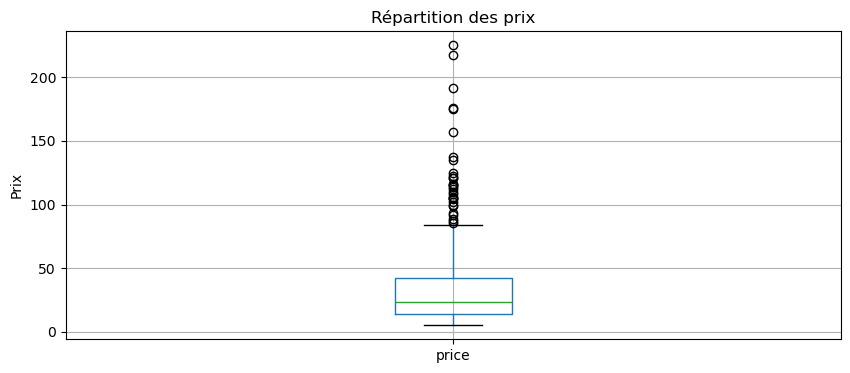

In [127]:
#Création de la boîte à moustache avec Matplotlib
plt.figure(figsize=(10, 4)) 
donnees.boxplot(column='price')

#Ajouter un titre et des labels
plt.title('Répartition des prix')
plt.ylabel('Prix')

#Afficher le graphique
plt.show()

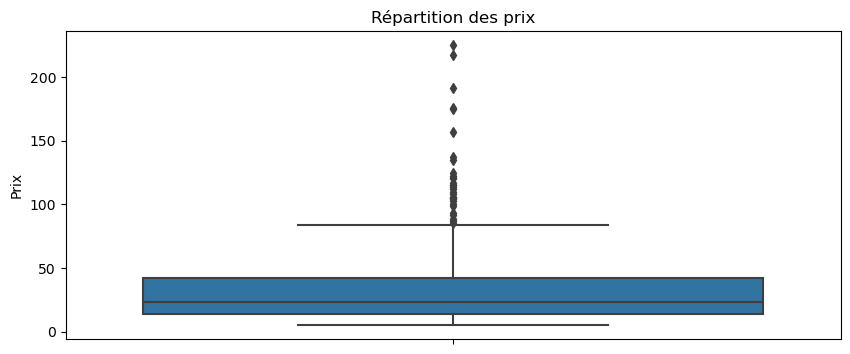

In [128]:
#Création de la boîte à moustache avec Seaborn
plt.figure(figsize=(10, 4))
sns.boxplot(y='price', data=donnees)

#Ajouter un titre
plt.title('Répartition des prix')
plt.ylabel('Prix')

#Afficher le graphique
plt.show()

In [129]:
#Autre méthode avec Plotly Express
import plotly.express as px

#Création de la boîte à moustache avec Plotly Express
fig = px.box(donnees, y='price', title='Répartition des prix')

#Afficher le graphique
fig.show()

<div style="font-size: 18px;">La visualisation de ces données avce <strong>Plotly Express</strong> nous donne ces informations :<br>
- prix max = 225 €<br>
- prix min = 5,20 €<br>
- médiane = 23,45 €<br>
- quartile Q1 = 14,05 €<br>
- quartile Q3 = 42,10 €<br>
- valeur adjacente max = 83,70 €<br>
- valeur adjacente min = 5,20 €
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [130]:
#Calculer la moyenne du prix
donnees_price_moyenne = donnees['price'].mean()
donnees_price_moyenne = round(donnees_price_moyenne,2)
print("Moyenne du prix :",donnees_price_moyenne)

#Calculer l'écart-type du prix
donnees_price_ecarttype = donnees['price'].std()
donnees_price_ecarttype = round(donnees_price_ecarttype,2)
print("Écart-type du prix :",donnees_price_ecarttype)

#Calculer le Z-score
donnees['z_score'] = round((donnees['price'] - donnees_price_moyenne) / donnees_price_ecarttype,2)

#Afficher le résultat
donnees

Moyenne du prix : 32.33
Écart-type du prix : 27.6


,product_id,price,purchase_price,onsale_web,stock_quantity,stock_status,id_web,total_sales,product_type,post_title,post_name,post_date_gmt,post_modified_gmt,post_author,post_type,post_excerpt,guid,z_score
0,3847,24.2,12.88,1,16,instock,15298,6.0,Vin,Pierre Jean Villa Saint-Joseph Préface 2018,pierre-jean-villa-saint-joseph-preface-2018,2018-02-08 11:58:52,2019-12-30 08:30:29,2.0,product,"Il exhale un nez subtil, racé avec du poivre f...",https://www.bottle-neck.fr/?post_type=product&...,-0.29
1,3849,34.3,17.54,1,10,instock,15296,9.0,Vin,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,pierre-jean-villa-saint-joseph-tilde-2017,2018-02-08 12:49:41,2019-12-21 08:00:17,2.0,product,Les vieilles vignes lui apportent une rare pro...,https://www.bottle-neck.fr/?post_type=product&...,0.07
2,3850,20.8,10.64,1,0,outofstock,15300,0.0,Vin,Pierre Jean Villa Crozes-Hermitage Accroche Co...,pierre-jean-villa-croze-hermitage-accroche-coe...,2018-02-08 13:08:36,2020-06-26 16:15:03,2.0,product,"Dentelle de fruit de jeunes syrah, aux tanins ...",https://www.bottle-neck.fr/?post_type=product&...,-0.42
3,4032,14.1,6.92,1,26,instock,19814,12.0,Vin,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,pierre-jean-villa-igp-gamine-2018,2018-02-09 13:01:05,2020-01-04 15:36:01,2.0,product,Gamine représente tout le fruité et la gourman...,https://www.bottle-neck.fr/?post_type=product&...,-0.66
4,4039,46.0,23.77,1,3,instock,19815,3.0,Vin,Pierre Jean Villa Côte Rôtie Carmina 2017,pierre-jean-villa-cote-rotie-carmina-2017,2018-02-12 08:04:37,2020-01-04 15:36:10,2.0,product,Le côte rôtie Carmina monte en puissance mais ...,https://www.bottle-neck.fr/?post_type=product&...,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,6930,8.4,4.34,1,28,instock,16135,9.0,Vin,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,mouthes-le-bihan-aime-chai-2015,2020-04-25 11:22:38,2020-08-26 15:35:03,2.0,product,Belle robe jeune à dominante rubis soutenue. N...,https://www.bottle-neck.fr/?post_type=product&...,-0.87
710,7023,27.5,14.21,1,23,instock,15891,9.0,Vin,Camin Larredya Jurançon Sec La Virada 2018,camin-larredya-jurancon-sec-la-virada-2018,2020-05-02 12:53:40,2020-08-26 15:35:02,2.0,product,L'exotisme du nez est complété par d'élégantes...,https://www.bottle-neck.fr/?post_type=product&...,-0.17
711,7025,69.0,34.22,1,8,instock,15887,5.0,Vin,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,jamet-cote-rotie-fructus-voluptas-2018,2020-05-02 13:00:54,2020-08-14 16:15:03,2.0,product,"Pour cette cuvée, Jean-Paul Jamet recherche un...",https://www.bottle-neck.fr/?post_type=product&...,1.33
712,7247,54.8,27.18,1,6,instock,13127-1,4.0,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-06-09 13:42:04,2020-07-20 15:09:06,2.0,product,"Nez gracieux, très élégant avec une touche flo...",https://www.bottle-neck.fr/?post_type=product&...,0.81


In [131]:
#Quels sont les prix dont z-score est supérieur à 3?
donnees_price_ecarttype_sup3 = donnees[donnees['z_score'] > 3][['price','z_score','product_type', 'total_sales', 'post_title']]

#Les trier par prix décroissant
donnees_price_ecarttype_sup3 = donnees_price_ecarttype_sup3.sort_values(by='price', ascending=False)
print(donnees_price_ecarttype_sup3)

#Compter le nombre de résultats
donnees_price_ecarttype_sup3_nbre = donnees_price_ecarttype_sup3.count()
print(donnees_price_ecarttype_sup3_nbre)

     price  z_score product_type  total_sales  \
199  225.0     6.98    Champagne         11.0   
426  217.5     6.71          Vin          2.0   
587  191.3     5.76    Champagne          6.0   
218  176.0     5.21       Cognac          3.0   
553  175.0     5.17          Vin          4.0   
221  157.0     4.52       Cognac          4.0   
381  137.0     3.79          Vin          3.0   
642  135.0     3.72    Champagne          5.0   
511  124.8     3.35          Vin          1.0   
603  122.0     3.25       Whisky          3.0   
654  121.0     3.21          Vin          3.0   
657  121.0     3.21          Vin          2.0   
648  116.4     3.05          Vin          5.0   

                                            post_title  
199     Champagne Egly-Ouriet Grand Cru Millésimé 2008  
426     David Duband Charmes-Chambertin Grand Cru 2014  
587  Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...  
218                               Cognac Frapin VIP XO  
553                Camille G

<div style="font-size: 18px;">Il y a 13 produits avec un prix dont le z-score est supérieur à 3<br>
Les prix n'ont pas l'air élevés si on les compare sur internet
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [132]:
#Utilisation de la fonction describe de Pandas pour l'étude des mesures de dispersions
donnees.describe()

,product_id,price,purchase_price,onsale_web,stock_quantity,total_sales,post_date_gmt,post_modified_gmt,post_author,z_score
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714,714,714.000000,714.000000
mean,5032.557423,32.333683,16.904006,0.998599,23.445378,8.054622,2018-08-22 02:29:08.581232384,2020-06-20 19:51:53.929971968,1.998599,0.000406
min,3847.000000,5.200000,2.740000,0.000000,0.000000,0.000000,2018-02-08 11:58:52,2018-02-20 14:19:23,1.000000,-0.980000
25%,4280.250000,14.062500,7.240000,1.000000,9.000000,5.000000,2018-02-27 19:01:12.500000,2020-06-18 16:32:35,2.000000,-0.660000
50%,4796.000000,23.450000,12.305000,1.000000,20.000000,8.000000,2018-04-19 12:52:10,2020-08-04 07:30:06.500000,2.000000,-0.320000
75%,5710.500000,42.075000,22.030000,1.000000,30.000000,11.000000,2019-01-31 13:35:47,2020-08-25 08:32:32,2.000000,0.350000
max,7338.000000,225.000000,137.810000,1.000000,145.000000,36.000000,2020-07-20 09:00:00,2020-08-27 16:55:03,2.000000,6.980000
std,790.510878,27.596332,14.827384,0.037424,22.219243,4.161344,NaN,NaN,0.037424,0.999870


In [133]:
#Définissez un seuil pour les articles "outliers" en prix
#Calculer les quartiles
Q1 = donnees['price'].quantile(0.25)
Q3 = donnees['price'].quantile(0.75)

#Calculer l'interval interquartile
interval_interquartile = Q3 - Q1

#Définir les seuils
seuil_bas = Q1 - 1.5 * interval_interquartile
seuil_haut = Q3 + 1.5 * interval_interquartile

#Filtrer les outliers
donnees_outliers = round(donnees[(donnees['price'] < seuil_bas) | (donnees['price'] > seuil_haut)],2)

#Trier les outliers par ordre décroissant de prix
donnees_outliers = donnees_outliers.sort_values(by='price', ascending=False)

#Afficher les outliers
print(donnees_outliers[['price']])

     price
199  225.0
426  217.5
587  191.3
218  176.0
553  175.0
221  157.0
381  137.0
642  135.0
511  124.8
603  122.0
654  121.0
657  121.0
648  116.4
653  115.0
656  115.0
604  114.0
437  112.0
227  109.6
219  108.5
647  105.6
432  105.0
431  105.0
222  104.0
380  102.3
63   100.0
655   99.0
602   93.0
502   92.0
65    88.4
438   86.8
205   85.6


In [134]:
#Nombre total de produits
donnees_nombre_total_produits = len(donnees)

#Nombre d'outliers
donnees_outliers_nombre = len(donnees_outliers)

#Pourcentage d'outliers
donnees_outliers_pourcentage = (donnees_outliers_nombre / donnees_nombre_total_produits) * 100

#Afficher les résultats
print(f"Nombre d'outliers : {donnees_outliers_nombre}")
print(f"Pourcentage d'outliers : {donnees_outliers_pourcentage:.2f}%")

Nombre d'outliers : 31
Pourcentage d'outliers : 4.34%


In [135]:
#Vérifier les ventes des outliers et comparer les prix par type de produit
donnees_price_moyenne_par_type = donnees.groupby('product_type')['price'].mean()
donnees_outliers_comparaison = round(donnees_outliers.merge(donnees_price_moyenne_par_type, on='product_type', suffixes=('_outlier', '_moyenne')),2)
# Ajouter une colonne qui calcule la différence entre le prix de vente et la moyenne pour chaque type de produit
donnees_outliers_comparaison['price_diff'] = donnees_outliers_comparaison['price_outlier'] - donnees_outliers_comparaison['price_moyenne']
donnees_outliers_comparaison_resultat = donnees_outliers_comparaison[['product_id', 'post_title', 'purchase_price', 'price_outlier', 'price_moyenne', 'price_diff', 'product_type', 'z_score']]
donnees_outliers_comparaison_resultat

,product_id,post_title,purchase_price,price_outlier,price_moyenne,price_diff,product_type,z_score
0,4352,Champagne Egly-Ouriet Grand Cru Millésimé 2008,137.81,225.0,69.63,155.37,Champagne,6.98
1,5001,David Duband Charmes-Chambertin Grand Cru 2014,116.87,217.5,29.28,188.22,Vin,6.71
2,5892,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,116.06,191.3,69.63,121.67,Champagne,5.76
3,4402,Cognac Frapin VIP XO,78.25,176.0,97.50,78.50,Cognac,5.21
4,5767,Camille Giroud Clos de Vougeot 2016,90.42,175.0,29.28,145.72,Vin,5.17
5,4406,Cognac Frapin Château de Fontpinot 1989 20 Ans...,69.08,157.0,97.50,59.50,Cognac,4.52
6,4904,Domaine Des Croix Corton Charlemagne Grand Cru...,67.95,137.0,29.28,107.72,Vin,3.79
7,6126,Champagne Gosset Célébris Vintage 2007,80.33,135.0,69.63,65.37,Champagne,3.72
8,5612,Domaine Weinbach Gewurztraminer Grand Cru Furs...,66.41,124.8,29.28,95.52,Vin,3.35
9,5917,Wemyss Malts Single Cask Scotch Whisky Choc 'n...,54.24,122.0,65.56,56.44,Whisky,3.25


<div style="font-size: 18px;">Les outliers ne sont pas tous justifiés<br>
Les bouteilles les plus chères font parties des données dites "abérrantes", mais leurs prix restent cohérants avec ceux du marché
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [136]:
##############################
# Calculer le CA du site web #
##############################

#Créer une colonne calculant le CA par article
donnees['ca_par_article'] = round(donnees['price'] * donnees['total_sales'],2)

#Filtrer uniquement les lignes où 'id_web' est renseigné (non nul)
donnees_web = donnees.dropna(subset=['id_web', 'ca_par_article'])

#Calculer la somme de la colonne "ca_par_article" pour obtenir le chiffre d'affaires total
donnees_web_ca_total = donnees_web['ca_par_article'].sum() 

#Afficher le résultat
print("Le chiffre d'affaires total du site web est : {:.2f} €".format(donnees_web_ca_total))

Le chiffre d'affaires total du site web est : 143680.10 €


In [137]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset donnees
donnees = donnees.sort_values(by='ca_par_article', ascending=False)

#Réinitialiser l'index du dataset par un reset_index
donnees.reset_index(drop=True, inplace=True)

#Afficher les 20 premier articles en CA
top_20_articles = donnees.head(20)
print(top_20_articles[['product_id', 'ca_par_article', 'post_title', 'total_sales']])

#Tronquer les 'post_title' pour ne garder que les premières lettres + ajouter l'index pour que chaque article reste unique
top_20_articles['post_title_tronque'] = top_20_articles['product_id'].astype(str) + '-' + top_20_articles['post_title'].str.slice(0, 12)

#Graphique en barres des 20 premiers articles avec plotly express
fig = px.bar(top_20_articles, 
             x='post_title_tronque',
             y='ca_par_article', 
             title="Top 20 des articles en CA et leur nombre de ventes",
             text='total_sales',
             labels={'ca_par_article': "CA (€)", 'post_title_tronque': 'Articles'},
             color='ca_par_article',
             color_continuous_scale='Plasma')

#Ajuster l'axe x pour éviter que les titres se chevauchent
fig.update_layout(xaxis_tickangle=-45)

#Afficher le graphique
fig.show()

    product_id  ca_par_article  \
0         4352          2475.0   
1         5892          1147.8   
2         4353          1113.0   
3         5826           824.0   
4         6212           805.0   
5         5026           781.2   
6         5008           735.0   
7         5767           700.0   
8         6126           675.0   
9         5025           672.0   
10        6201           633.6   
11        4406           628.0   
12        4647           627.0   
13        4358           616.0   
14        4359           599.2   
15        6214           594.0   
16        6202           582.0   
17        4350           556.5   
18        4573           537.6   
19        4402           528.0   

                                           post_title  total_sales  
0      Champagne Egly-Ouriet Grand Cru Millésimé 2008         11.0  
1   Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...          6.0  
2           Champagne Egly-Ouriet Grand Cru Brut Rosé         14.0  
3        

/var/folders/k4/rxs7cpkn25x36yd1rknb1pvc0000gn/T/ipykernel_48881/79817323.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [138]:
#Proportion pour chaque type de produit dans ce Top 20
top_20_articles_par_type = top_20_articles['product_type'].value_counts()
top_20_articles_par_type_pourcentage = (top_20_articles_par_type / len(top_20_articles)) * 100
top_20_articles_par_type_pourcentage

product_type
Champagne    45.0
Vin          45.0
Cognac       10.0
Name: count, dtype: float64

In [139]:
#Analyse du CA par type de produit
#Regrouper par 'product_type' et calculer la somme des ventes
donnees_CA_par_categorie = donnees.groupby('product_type')['ca_par_article'].sum().reset_index()

#Renommer la colonne pour plus de clarté
donnees_CA_par_categorie.columns = ['Type de Produit', 'CA']

#Calculer le pourcentage pour chaque catégorie
donnees_CA_par_categorie['Pourcentage'] = round((donnees_CA_par_categorie['CA'] / donnees_web_ca_total) * 100,2)

#Afficher le résultat
print(donnees_CA_par_categorie)

  Type de Produit        CA  Pourcentage
0          Cadeau     175.0         0.12
1       Champagne   12928.6         9.00
2          Cognac    3170.2         2.21
3             Gin     504.0         0.35
4   Huile d'olive     497.7         0.35
5             Vin  123518.0        85.97
6          Whisky    2886.6         2.01


In [140]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
donnees_total_ca = donnees['ca_par_article'].sum()
donnees['part_ca'] = round(donnees['ca_par_article'] / donnees_total_ca * 100,2)

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
donnees['cumul_ca'] = donnees['part_ca'].cumsum()

#Grâce aux deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
donnees_80_ca = donnees[donnees['cumul_ca'] <= 80]
donnees_80_ca_somme = len(donnees_80_ca)

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
donnees_web_nb_articles = len(donnees_web)
donnees_80_CA_proportion_articles = (donnees_80_ca_somme / donnees_web_nb_articles) *100
print(f"Proportion d'articles représentant 80 % du CA du site web : {donnees_80_CA_proportion_articles:.2f} %")

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier
print("Certaines données étant manquantes, nous ne pouvons afficher le CA hors site web (nous n'avons pas les quantités vendues)")

Proportion d'articles représentant 80 % du CA du site web : 60.64 %
Certaines données étant manquantes, nous ne pouvons afficher le CA hors site web (nous n'avons pas les quantités vendues)


<div style="font-size: 18px;">Le champagne représente près de la moitié du chiffre d'affaires du TOP 20 mais moins de 10% du CA total<br>
L'effet pareto n'est pas pertinant pour analyser ces données
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [141]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset
donnees = donnees.sort_values(by='total_sales', ascending=False)

#Réinitialiser l'index du dataset par un reset_index
donnees.reset_index(drop=True, inplace=True)

#Afficher les 20 premier articles en quantité
top_20_ventes = donnees.head(20)
print(top_20_ventes[['product_id', 'total_sales', 'ca_par_article', 'post_title']])

#Tronquer les 'post_title' pour ne garder que les premières lettres + ajouter l'index pour que chaque article reste unique
top_20_ventes['post_title_tronque'] = top_20_ventes['product_id'].astype(str) + '-' + top_20_ventes['post_title'].str.slice(0, 12)

#Créer une nouvelle colonne formatée pour 'ca_par_article' en euros sans décimales
top_20_ventes['ca_par_article_formate'] = top_20_ventes['ca_par_article'].apply(lambda x: f"{int(x)} €")

#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(top_20_ventes, 
             x='post_title_tronque',
             y='total_sales', 
             title="Top 20 des articles en quantité et leur CA",
             text='ca_par_article_formate',
             labels={'total_sales': "Quantité vendue", 'post_title_tronque': 'Articles'},
             color='total_sales',
             color_continuous_scale='Viridis',
             hover_data={'ca_par_article_formate': True})

#Ajuster l'axe x pour éviter que les titres se chevauchent
fig.update_layout(xaxis_tickangle=-45)

#Afficher le graphique
fig.show()

    product_id  total_sales  ca_par_article  \
0         4867         36.0           356.4   
1         4203         27.0           267.3   
2         4275         24.0           357.6   
3         4726         22.0           279.4   
4         4647         22.0           627.0   
5         5826         20.0           824.0   
6         6129         20.0           104.0   
7         4220         18.0           208.8   
8         5803         17.0           290.7   
9         6569         17.0           493.0   
10        5778         17.0            98.6   
11        5695         16.0           104.0   
12        5777         16.0            91.2   
13        4059         16.0           139.2   
14        4863         16.0           131.2   
15        4188         16.0           152.0   
16        4870         16.0           148.8   
17        4105         16.0           108.8   
18        4204         15.0           169.5   
19        4159         15.0           139.5   

            

/var/folders/k4/rxs7cpkn25x36yd1rknb1pvc0000gn/T/ipykernel_48881/792771055.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/k4/rxs7cpkn25x36yd1rknb1pvc0000gn/T/ipykernel_48881/792771055.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [142]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
donnees_total_ventes_quantite = donnees['total_sales'].sum()
donnees['part_ventes_quantite'] = round(donnees['total_sales'] / donnees_total_ventes_quantite * 100,2)

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
donnees['cumul_ventes_quantite'] = donnees['part_ventes_quantite'].cumsum()

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
donnees_80_ventes = donnees[donnees['cumul_ventes_quantite'] <= 80]
donnees_80_ventes_somme = len(donnees_80_ventes)

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
donnees_80_ventes_proportion_articles = (donnees_80_ventes_somme / donnees_web_nb_articles) *100
print(f"Proportion d'articles représentant 80 % du CA du site web : {donnees_80_ventes_proportion_articles:.2f} %")
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier
print("Certaines données étant manquantes, nous ne pouvons afficher le CA hors site web (nous n'avons pas les quantités vendues)")

Proportion d'articles représentant 80 % du CA du site web : 60.50 %
Certaines données étant manquantes, nous ne pouvons afficher le CA hors site web (nous n'avons pas les quantités vendues)


In [143]:
#Analyse des ventes par type de produit
# #Calculer la somme de la colonne 'total_sales'
donnees_nombre_ventes = donnees['total_sales'].sum()

#Regrouper par 'product_type' et calculer la somme des ventes
donnees_ventes_par_categorie = donnees.groupby('product_type')['total_sales'].sum().reset_index()

#Renommer la colonne pour plus de clarté
donnees_ventes_par_categorie.columns = ['Type de Produit', 'Nombre de Ventes']

#Calculer le pourcentage pour chaque catégorie
donnees_ventes_par_categorie['Pourcentage'] = round((donnees_ventes_par_categorie['Nombre de Ventes'] / donnees_nombre_ventes) * 100,2)

#Afficher le résultat
print(donnees_ventes_par_categorie)

  Type de Produit  Nombre de Ventes  Pourcentage
0          Cadeau               7.0         0.12
1       Champagne             169.0         2.94
2          Cognac              35.0         0.61
3             Gin              14.0         0.24
4   Huile d'olive              22.0         0.38
5             Vin            5456.0        94.87
6          Whisky              48.0         0.83


<div style="font-size: 18px;">Le vin représente 94,87 % du nombre de ventes<br>
Le champagne en représente 2,94 %<br>
L'effet pareto n'est pas pertinant pour analyser ces données
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [144]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Import de numpy 
import numpy as np

#Création de la colonne Rotation de stock (mois d'octobre)
donnees['rotation_stock'] = round(donnees['stock_quantity'] / donnees['total_sales'],2)

#Remplacement des "inf" par 0
donnees['rotation_stock'].replace([np.inf, -np.inf], 0, inplace=True)

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset
donnees = donnees.sort_values(by='rotation_stock', ascending=False)

#Réinitialiser l'index du dataset par un reset_index
donnees.reset_index(drop=True, inplace=True)

#Affichage du flop 20 des produits qui ont le plus de mois de stock
flop_20_rotation_stock = round(donnees[['product_id', 'post_title','rotation_stock', 'price', 'total_sales','ca_par_article']].head(20))
print(flop_20_rotation_stock)

#Tronquer les 'post_title' pour ne garder que les premières lettres + ajouter l'index pour que chaque article reste unique
flop_20_rotation_stock['post_title_tronque'] = flop_20_rotation_stock['product_id'].astype(str) + '-' + top_20_ventes['post_title'].str.slice(0, 12)

#Graphique en barre du flop 20 des produits qui ont le plus de temps de stock
fig = px.bar(flop_20_rotation_stock, 
             x='post_title_tronque',
             y='rotation_stock', 
             title="Flop20 des pires rotations de stock et leur nombre de vente",
             text='total_sales',
             color='rotation_stock', 
             color_continuous_scale='Inferno',
             labels={'rotation_stock': "Temps (en mois)", 'post_title_tronque': 'Articles'})

#Ajuster l'axe x pour éviter que les titres se chevauchent
fig.update_layout(xaxis_tickangle=-45)

#Afficher le graphique
fig.show()

    product_id                                         post_title  \
0         4142              Champagne Gosset Grand Millésime 2006   
1         6126             Champagne Gosset Célébris Vintage 2007   
2         4356  Champagne Egly-Ouriet Premier Cru Les Vignes d...   
3         4348     Champagne Egly-Ouriet Grand Cru Brut Tradition   
4         4148               Champagne Mailly Grand Cru Brut Rosé   
5         4357              Champagne Larmandier-Bernier Latitude   
6         4144                        Champagne Gosset Grand Rosé   
7         5025  Champagne Agrapart &amp; Fils L'Avizoise Extra...   
8         4350    Champagne Egly-Ouriet Grand Cru Extra Brut V.P.   
9         4150       Champagne Mailly Grand Cru Intemporelle 2010   
10        4334             Champagne Gosset Grand Blanc de Blancs   
11        4149  Champagne Mailly Grand Cru Intemporelle Rosé 2009   
12        5612  Domaine Weinbach Gewurztraminer Grand Cru Furs...   
13        4582  Château de Meursau

/var/folders/k4/rxs7cpkn25x36yd1rknb1pvc0000gn/T/ipykernel_48881/3211326857.py:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [145]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
donnees['valorisation_stock'] = round(donnees['stock_quantity'] * donnees['price'],2)

#Calculer la somme de la colonne "Valorisation_stock_euros"
somme_valorisation_stock = donnees['valorisation_stock'].sum()

#Afficher le résultat
print("La somme de la valorisation des stocks en euros est de : {:.2f} €".format(somme_valorisation_stock))

La somme de la valorisation des stocks en euros est de : 494637.90 €


In [146]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity
stock_quantity_somme = donnees['stock_quantity'].sum()
print("La somme du nombre de produits en stock est de : {:.0f}".format(stock_quantity_somme))

La somme du nombre de produits en stock est de : 16740


In [147]:
# Analyse du stock par type de produit
# Regrouper par 'product_type', calculer le nombre de produits et la valorisation du stock
donnees_stock_par_categorie = donnees.groupby('product_type').agg({
    'stock_quantity': 'sum',
    'valorisation_stock': 'sum'
}).reset_index()

# Renommer les colonnes pour plus de clarté
donnees_stock_par_categorie.columns = ['Type de Produit', 'Stock', 'Valorisation stock (€)']

# Calculer le pourcentage pour chaque catégorie
donnees_stock_par_categorie['Pourcentage Stock'] = round((donnees_stock_par_categorie['Stock'] / stock_quantity_somme) * 100, 2)
donnees_stock_par_categorie['Pourcentage Valorisation'] = round((donnees_stock_par_categorie['Valorisation stock (€)'] / somme_valorisation_stock) * 100, 2)

# Afficher le résultat
print(donnees_stock_par_categorie)

  Type de Produit  Stock  Valorisation stock (€)  Pourcentage Stock  \
0          Cadeau     23                  575.00               0.14   
1       Champagne   2894               192482.95              17.29   
2          Cognac     99                 9761.20               0.59   
3             Gin     11                  396.00               0.07   
4   Huile d'olive    158                 3131.70               0.94   
5             Vin  13470               282258.15              80.47   
6          Whisky     85                 6032.90               0.51   

   Pourcentage Valorisation  
0                      0.12  
1                     38.91  
2                      1.97  
3                      0.08  
4                      0.63  
5                     57.06  
6                      1.22  


<div style="font-size: 18px;">Le champagne représente 38,91 % de la valorisation du stock pour 2,94 % du nombre de ventes
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [148]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
#La taxe sur les boissons alcoolisées est de 20%
tva = 0.2
donnees['prix_ht'] = round(donnees['price'] / (1 + tva),2)

#Création de la colonne Taux de marge
donnees['taux_marge'] = round((donnees['prix_ht'] - donnees['purchase_price']) / donnees['prix_ht'] * 100,2)


#Afficher le prix minimum de la colonne "taux_marge"
donnees_taux_marge_min = donnees['taux_marge'].min()
print("Le prix minimum de la colonne 'taux_marge' est de : {:.2f}%".format(donnees_taux_marge_min))

#Afficher le prix maximum de la colonne "taux_marge"
donnees_taux_marge_max = donnees['taux_marge'].max()
print("Le prix maximum de la colonne 'taux_marge' est de : {:.2f}%".format(donnees_taux_marge_max))

Le prix minimum de la colonne 'taux_marge' est de : -635.10%
Le prix maximum de la colonne 'taux_marge' est de : 47.75%


In [149]:
#Affichage de la ligne avec un taux de marge inférieur à 0
donnees_taux_marge_negatif = donnees[donnees['taux_marge'] < 0]
donnees_taux_marge_negatif

,product_id,price,purchase_price,onsale_web,stock_quantity,stock_status,id_web,total_sales,product_type,post_title,...,z_score,ca_par_article,part_ca,cumul_ca,part_ventes_quantite,cumul_ventes_quantite,rotation_stock,valorisation_stock,prix_ht,taux_marge
691,4355,12.65,77.48,1,97,instock,12589,0.0,Champagne,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,...,-0.71,0.0,0.0,100.12,0.0,99.84,0.0,1227.05,10.54,-635.1


In [150]:
#Création d'un dataframe avec les taux positifs
donnees_taux_marge__positif = donnees[donnees['taux_marge'] > 0]

#Afficher le prix minimum de la colonne "taux_marge"
donnees_taux_marge__positif_min = donnees_taux_marge__positif['taux_marge'].min()
print("Le prix minimum de la colonne 'taux_marge' est de : {:.2f}%".format(donnees_taux_marge__positif_min))

#Afficher le prix maximum de la colonne "taux_marge"
donnees_taux_marge__positif_max = donnees_taux_marge__positif['taux_marge'].max()
print("Le prix minimum de la colonne 'taux_marge' est de : {:.2f}%".format(donnees_taux_marge__positif_max))


Le prix minimum de la colonne 'taux_marge' est de : 22.80%
Le prix minimum de la colonne 'taux_marge' est de : 47.75%


In [151]:
#Création d'un dataframe avec le taux de marge moyen par type de produit
donnees_taux_marge_moyen = round(donnees.groupby('product_type')['taux_marge'].mean().reset_index(),2)

#Les trier du plus grand au plus petit
donnees_taux_marge_moyen = donnees_taux_marge_moyen.sort_values(by='taux_marge', ascending=False)

#Fusionner le dataframe avec celui des prix moyens par catégories sur 'product_type'
donnees_taux_marge_moyen = donnees_taux_marge_moyen.merge(donnees_price_moyenne_par_type, on='product_type')

#Graphique affichant le taux de marge par type de produit
fig = px.bar(donnees_taux_marge_moyen, x='product_type', y='taux_marge',
             title='Taux de marge et prix moyen par type de produit',
             labels={'product_type': 'Type de produit', 'taux_marge': 'Taux de marge moyen'},
             color='taux_marge', 
             color_continuous_scale='RdBu',
             text='price')  

#Ajuster le texte pour afficher en euros avec 2 décimales
fig.for_each_trace(lambda t: t.update(text=[f'{v:.2f} €' for v in t.text]))

#Afficher le graphique
fig.show()

<div style="font-size: 18px;">Le champagne représente 9 % du chiffre d'affaires mais sa marge n'est que de 4,79 % <br>
Il semble y avoir une erreur de saisie pour un produit ayant un taux de marge de -635.10 %
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

In [152]:
############################
# Analyse des correlations #
############################
#Importation de Seaborn

#Création d'un heatmap de correlation avec les variables stock, sales et price
#On peut également créer un mask pour n'afficher qu'une demi heatmap

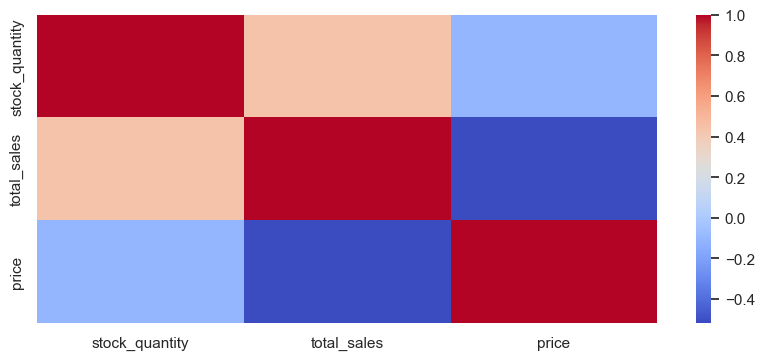

In [153]:
#Sélection des colonnes pour l'analyse de corrélation
correlation_colonnes = ['stock_quantity', 'total_sales', 'price']

#Créer une matrice de corrélation
sns.set(rc={'figure.figsize':(10,4)})

#Calcul de la matrice de corrélation
correlation_matrice = donnees[correlation_colonnes].corr()

ax = sns.heatmap(correlation_matrice, xticklabels = correlation_matrice.columns , 
                 yticklabels = correlation_matrice.columns, cmap = 'coolwarm')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



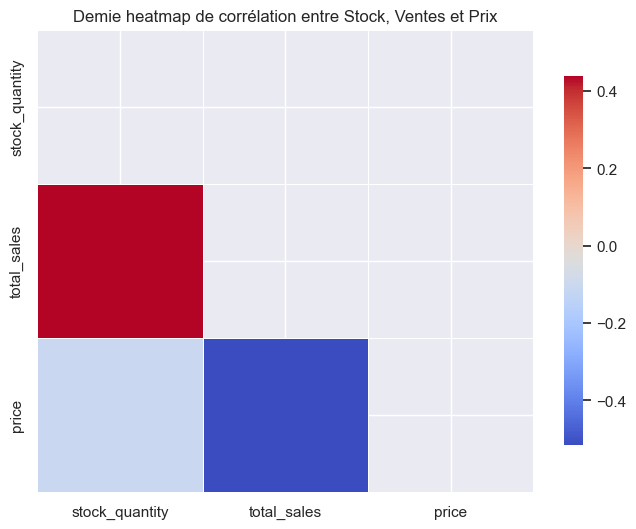

In [154]:
#Créer un masque pour n'afficher que la moitié de la heatmap
mask = np.triu(np.ones_like(correlation_matrice, dtype=bool))

#Créer la heatmap avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrice, annot=True, fmt=".2f", mask=mask, cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": .8})

#Afficher le titre
plt.title('Demie heatmap de corrélation entre Stock, Ventes et Prix')

#Affichage de la heatmap
plt.show()

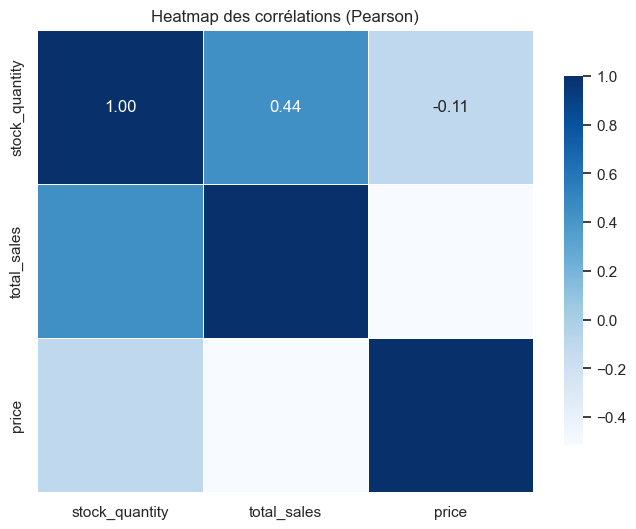

In [155]:
#Créer la heatmap en utilisant une corrélation de Pearson 
from scipy.stats import pearsonr

#Calculer la matrice de corrélation avec la méthode Pearson
correlation_matrice_pearson = donnees[correlation_colonnes].corr(method='pearson')

#Fonction pour calculer les p-values avec pearsonr
def calcul_p_values_pearson(df):
    p_values = pd.DataFrame(np.zeros((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)
    for i in df.columns:
        for j in df.columns:
            if i != j:
                corr_test = pearsonr(df[i], df[j])
                p_values.loc[i, j] = corr_test[1]
            else:
                p_values.loc[i, j] = np.nan
    return p_values

#Calculer les p-values pour les colonnes sélectionnées
p_value_matrice_pearson = calcul_p_values_pearson(donnees[correlation_colonnes])

#Créer la heatmap avec les coefficients de corrélation et les annotations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrice_pearson, annot=True, fmt=".2f", cmap='Blues', linewidths=0.5, cbar_kws={"shrink": .8})

#Ajouter le titre
plt.title('Heatmap des corrélations (Pearson)')

#Afficher la heatmap
plt.show()

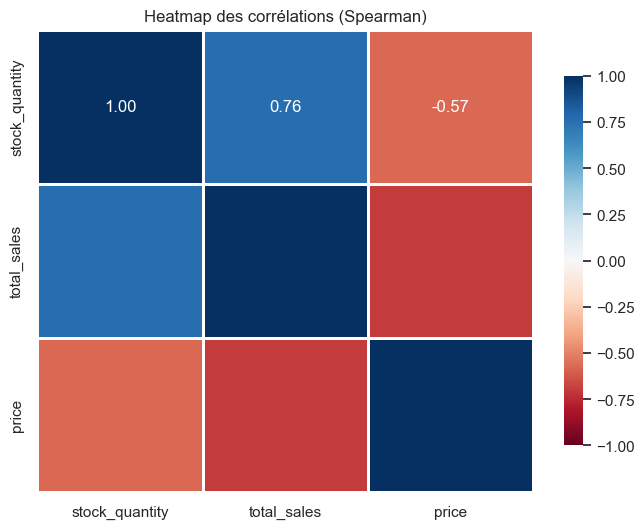

In [156]:
#Créer la heatmap en utilisant une corrélation de Spearman :
from scipy.stats import spearmanr

#Calculer de la matrice de corrélation avec .corr() en utilisant la méthode Spearman
correlation_matrice_spearman = donnees[correlation_colonnes].corr(method='spearman')

#Fonction pour calculer les p-values avec spearmanr
def calcul_p_values_spearman(df):
    p_values = pd.DataFrame(np.zeros((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)
    for i in df.columns:
        for j in df.columns:
            if i != j:
                corr_test = spearmanr(df[i], df[j])
                p_values.loc[i, j] = corr_test[1]  # La p-value est le deuxième élément retourné par spearmanr
            else:
                p_values.loc[i, j] = np.nan  # On ne calcule pas la p-value pour une corrélation avec elle-même
    return p_values

#Calculer des p-values pour les colonnes sélectionnées en utilisant le test de Spearman
p_value_matrice_spearman = calcul_p_values_spearman(donnees[correlation_colonnes])

#Créer d'un masque pour n'afficher qu'une demi heatmap
mask = np.triu(np.ones_like(correlation_matrice_spearman, dtype=bool))

#Créer la heatmap avec les coefficients de corrélation et les annotations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrice_spearman, annot=True, fmt=".2f", cmap='RdBu', center=0, linewidths=1, vmin=-1, vmax=1, cbar_kws={"shrink": .8})

#Ajouter le titre
plt.title('Heatmap des corrélations (Spearman)')

#Afficher la heatmap
plt.show()

<div style="font-size: 18px;">La heatmap la plus pertinente est celle créée en utilisant la méthode de Spearman<br>
Il y a une très forte corrélation entre <strong>stock_quantity</strong> et <strong>total_sales</strong><br>
Il ya aussi une corrélation négative assez forte entre <strong>price</strong> et <strong>total_sales</strong>, ce qui signifie que les ventes baissent lorsque les prix sont élevés
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [157]:
#Mettre le dataset sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  

chemin_fichier_excel = '/Users/adrianaguilera/Desktop/P6/donnees.xlsx'
donnees.to_excel(chemin_fichier_excel, index=False)